# 📊 Relatório Técnico: Estratégias de Marketing em Instituições Bancárias

## Análise Exploratória e Modelagem Preditiva da Adesão de Clientes a Campanhas Bancárias

### 📌 Contexto do Projeto

O Banco Aurora, instituição financeira de médio porte com forte atuação no setor de crédito pessoal e investimentos, tem investido em campanhas de marketing direto para aumentar sua base de clientes. Essas campanhas consistem em contatos por telefone e e-mail, oferecendo produtos como depósitos a prazo e planos de investimento.

Apesar do esforço, a taxa de adesão dos clientes tem sido relativamente baixa. Isso gera custos operacionais elevados, já que muitas tentativas de contato não resultam em conversões. Diante desse cenário, a diretoria solicitou à equipe de Ciência de Dados uma análise detalhada dos dados históricos de campanhas, com os seguintes objetivos:

* Identificar padrões e perfis de clientes que mais aderem às ofertas.

* Otimizar as estratégias de marketing, reduzindo o custo por aquisição.

* Construir um modelo preditivo de classificação, capaz de indicar a probabilidade de um cliente aderir à campanha.

No decorrer deste relatório, serão apresentadas análises exploratórias e modelagens preditivas utilizando algoritmos de boosting, como XGBoost, LightGBM e Catboost. Além disso, simulações de perguntas feitas pelo CEO e pelo gerente de marketing serão respondidas com base em insights extraídos do dataset.

### 📊 Sumário

1. Importação de Bibliotecas

2. Sumário do Conjunto de Dados

3. Análise Exploratória de Dados (EDA)

4. Preparação e Tratamento dos Dados

5. Construção de Modelos de Classificação

6. Avaliação de Desempenho dos Modelos

7. Insights, Conclusões e Recomendações

### 🧭 Estratégia de Solução – Projeto Bank Marketing

#### Etapas do processo analítico:

1. Importação e visualização inicial do dataset
    * Carregar os dados do histórico de campanhas do Banco Aurora e exibir as primeiras linhas.

2. Verificação da estrutura e dimensões do conjunto de dados
    * Conferir número de linhas, colunas e tipos de variáveis.

3. Análise de valores nulos e tratamento, se necessário
    * Identificar valores faltantes e decidir se serão removidos ou imputados.

4. Verificação dos tipos de variáveis
    * Separar variáveis em numéricas (ex: idade, saldo) e categóricas (ex: profissão, estado civil, tipo de campanha).

5. Estatísticas descritivas para cada variável
    * Média, mediana, desvio padrão para numéricas; contagem e proporção para categóricas.

6. Visualizações univariadas
    * Histogramas, boxplots e gráficos de barra para entender a distribuição das variáveis.

7. Visualizações bivariadas
    * Matriz de correlação, gráficos de dispersão e boxplots comparativos entre variáveis e a target (subscribed).

8. Análise de distribuições conforme a variável target
    * Comparar perfis de clientes que aderiram e não aderiram às campanhas, identificando padrões.

9. Formulação e testes de hipóteses estatísticas
    * Testar relações significativas entre variáveis categóricas e numéricas versus adesão (subscribed).

10. Aplicação de algoritmos de classificação
    * Treinar modelos de boosting (XGBoost, LightGBM e CatBoost) para prever a probabilidade de adesão.

11. Avaliação de desempenho dos modelos
    * Medir AUC-ROC, acurácia, precisão, recall e F1-score para comparar os modelos.

12. Extração de variáveis mais importantes (feature importance)
    * Identificar quais características do cliente mais influenciam a adesão às campanhas.

13. Geração de recomendações estratégicas
    * Indicar segmentos de clientes com maior probabilidade de adesão e sugerir otimização das campanhas.

### 🎯 Objetivo Final

O objetivo central deste estudo é desenvolver um modelo preditivo de classificação capaz de estimar a probabilidade de adesão de clientes às campanhas de marketing do Banco Aurora. Com base em dados históricos de campanhas, incluindo variáveis demográficas, financeiras e comportamentais dos clientes, o modelo deverá identificar perfis com maior propensão à conversão.
A partir dos resultados, serão gerados insights estratégicos que permitam à instituição financeira otimizar a alocação de recursos em campanhas, reduzir o custo por aquisição e direcionar esforços de marketing para segmentos de clientes com maior potencial de retorno. Adicionalmente, a análise permitirá compreender os fatores determinantes da adesão, contribuindo para decisões mais assertivas em futuras estratégias de marketing e oferta de produtos financeiros.

* ### 🗂️Dicionário dos dados fornecidos pelo banco:

    * age – Idade do cliente em anos;
    * job – Ocupação ou profissão do cliente,;
    * marital – Estado civil do cliente;
        * married → casado(a)
        * single → solteiro(a)
        * divorced → divorciado(a)
    * education – Nível de escolaridade do cliente;
        * secondary → ensino médio
        * tertiary → ensino superior
        * primary → ensino fundamental
        * unknown → desconhecido
    * default – Indica se o cliente possui histórico de inadimplência em crédito (sim ou não);
    * balance – Saldo médio anual da conta do cliente em euros;
    * housing – Indica se o cliente possui empréstimo habitacional (sim ou não);
    * loan – Indica se o cliente possui empréstimo pessoal (sim ou não);
    * contact – Meio de contato utilizado na última campanha, como telefone ou e-mail;
    * day – Dia do mês em que o cliente foi contatado na campanha;
    * month – Mês em que o cliente foi contatado na campanha;
    * duration – Duração do último contato com o cliente em segundos;
    * campaign – Número de contatos realizados durante a campanha atual para este cliente;
    * pdays – Número de dias desde o último contato em campanhas anteriores (-1 se não houver);
    * previous – Número de contatos realizados em campanhas anteriores;
    * poutcome – Resultado da campanha anterior, como sucesso, fracasso ou inexistente;
    * deposit – Variável alvo que indica se o cliente aderiu à oferta de depósito a prazo
        * Sim - cliente aderiu
        * Não - cliente não aderiu

## 1. Importação de Bibliotecas:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from skopt import  BayesSearchCV
from skopt.space import Real, Categorical, Integer
import lightgbm as lgb
from lightgbm import LGBMClassifier
import catboost as cat
from catboost import CatBoostClassifier

## 2. Sumário do Conjunto de Dados
* ### Importando Dados:

In [3]:
dados = pd.read_csv('data/bank.csv')
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


* ### Verificação de estrutura e dimensões do conjunto de dados;

In [4]:
dados.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


* ### Análise de valores nulos e tratamento (se necessário);

In [5]:
dados.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* ### Verificação dos tipos de variáveis;

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## 3. Análise Exploratória de Dados (EDA)

* ### Analisando Variável Alvo 'deposit'

In [7]:
dados['deposit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: deposit
Non-Null Count  Dtype 
--------------  ----- 
11162 non-null  object
dtypes: object(1)
memory usage: 87.3+ KB


In [8]:
dados['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

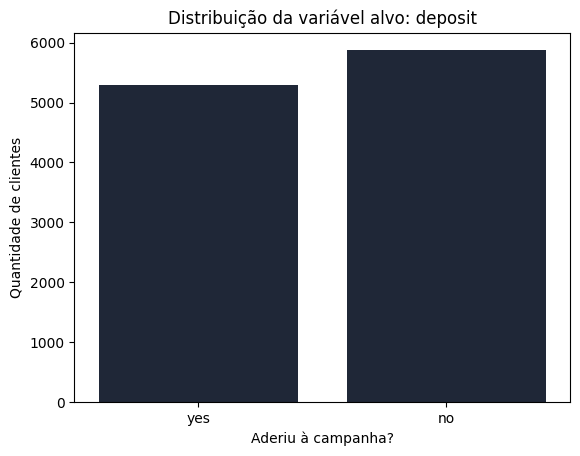

In [9]:
sns.countplot(data=dados, x='deposit', color='#1B263B')
plt.title('Distribuição da variável alvo: deposit')
plt.xlabel('Aderiu à campanha?')
plt.ylabel('Quantidade de clientes')
plt.show()

<font color = 'milkblue'>

A análise da variável alvo deposit, que indica a adesão ao depósito a prazo, revelou que 5.873 clientes (52,6%) não aceitaram a oferta, enquanto 5.289 clientes (47,4%) aceitaram.
Esses resultados mostram uma distribuição relativamente equilibrada entre os dois grupos, evidenciando que, embora a maioria tenha optado por não investir, uma parcela significativa dos clientes aderiu ao produto.

</font>

* ### Analisando Variável 'age'

In [10]:
dados['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: age
Non-Null Count  Dtype
--------------  -----
11162 non-null  int64
dtypes: int64(1)
memory usage: 87.3 KB


In [11]:
dados['age'].value_counts().reset_index()

,age,count
0,31,496
1,32,477
2,34,466
3,33,464
4,35,461
...,...,...
71,92,2
72,88,2
73,93,2
74,95,1


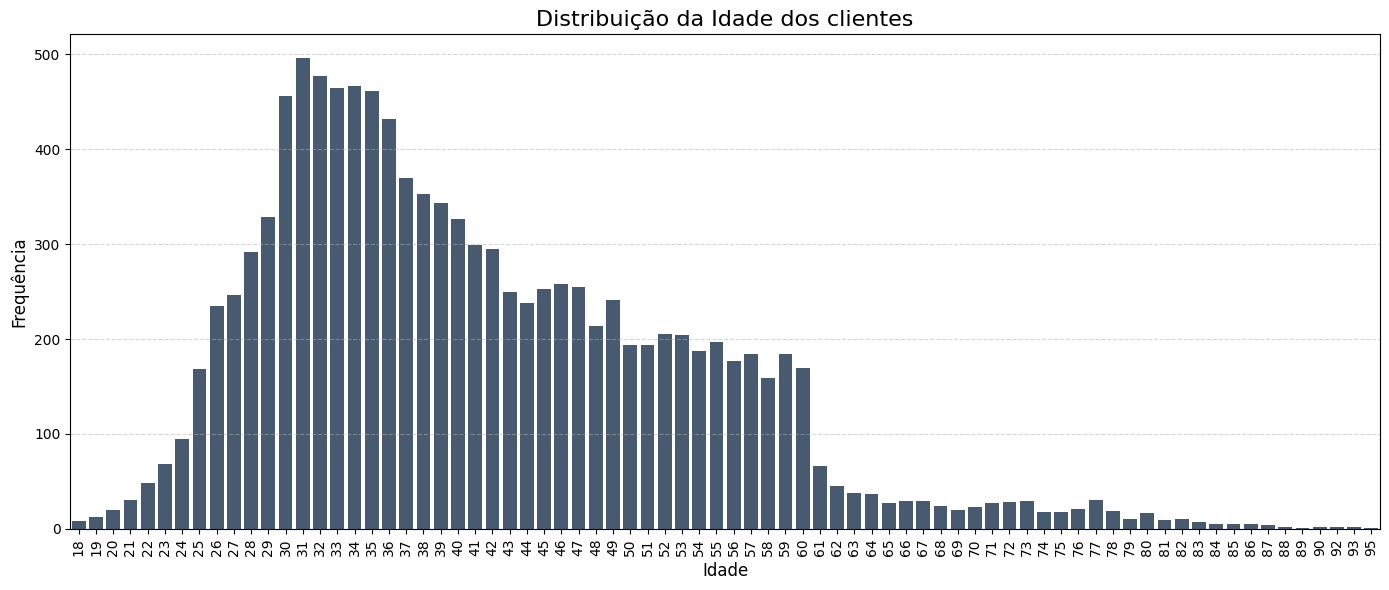

In [146]:
# Contagem dos valores únicos de 'age'
idade = dados['age'].value_counts().sort_index()  # ordena pela idade crescente

plt.figure(figsize=(14, 6))  
sns.barplot(x=idade.index, y=idade.values, color ='#415A77')
plt.title('Distribuição da Idade dos clientes', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

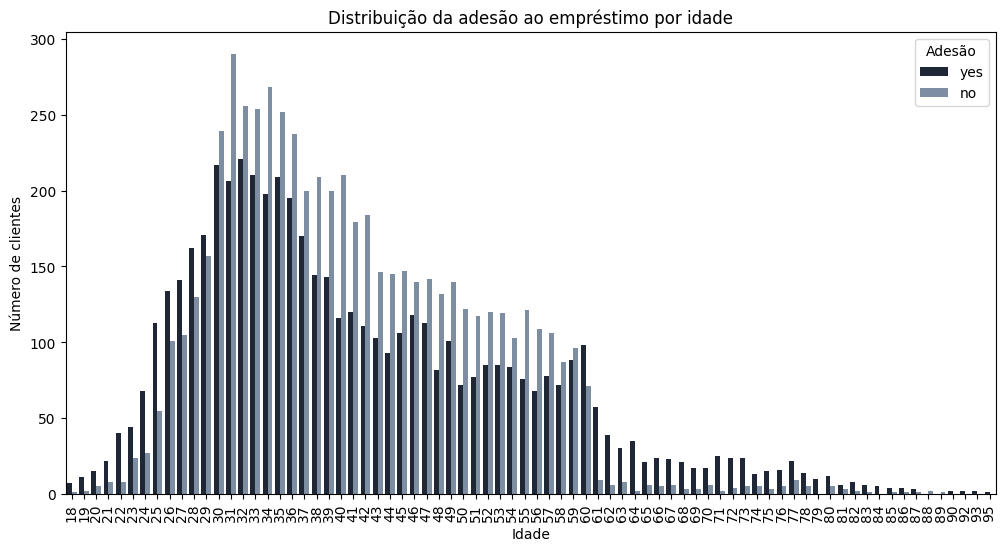

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(data=dados, x='age', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Idade')
plt.ylabel('Número de clientes')
plt.title('Distribuição da adesão ao empréstimo por idade')
plt.legend(title='Adesão')
plt.xticks(rotation=90)
plt.show()

<font color = 'milkblue'>
Com base na análise dos gráficos, observa-se que a faixa etária predominante na oferta de depósito a prazo concentra-se entre 30 e 36 anos, destacando-se os clientes com 31 anos, que representam o maior grupo, totalizando 496 indivíduos. Dentre esses 496 clientes, aproximadamente 250 (cerca de 50,4%) não aderiram à oferta, enquanto os 246 restantes (49,6%) optaram por investir no produto.
Esses resultados evidenciam um equilíbrio entre adesão e rejeição na faixa etária analisada, embora com uma ligeira predominância de clientes que não aderiram.
</font>

* ### Analisando Variável 'job'

In [14]:
dados['job'].describe()

count          11162
unique            12
top       management
freq            2566
Name: job, dtype: object

In [15]:
dados['job'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: job
Non-Null Count  Dtype 
--------------  ----- 
11162 non-null  object
dtypes: object(1)
memory usage: 87.3+ KB


In [16]:
dados['job'].value_counts().reset_index()

,job,count
0,management,2566
1,blue-collar,1944
2,technician,1823
3,admin.,1334
4,services,923
5,retired,778
6,self-employed,405
7,student,360
8,unemployed,357
9,entrepreneur,328


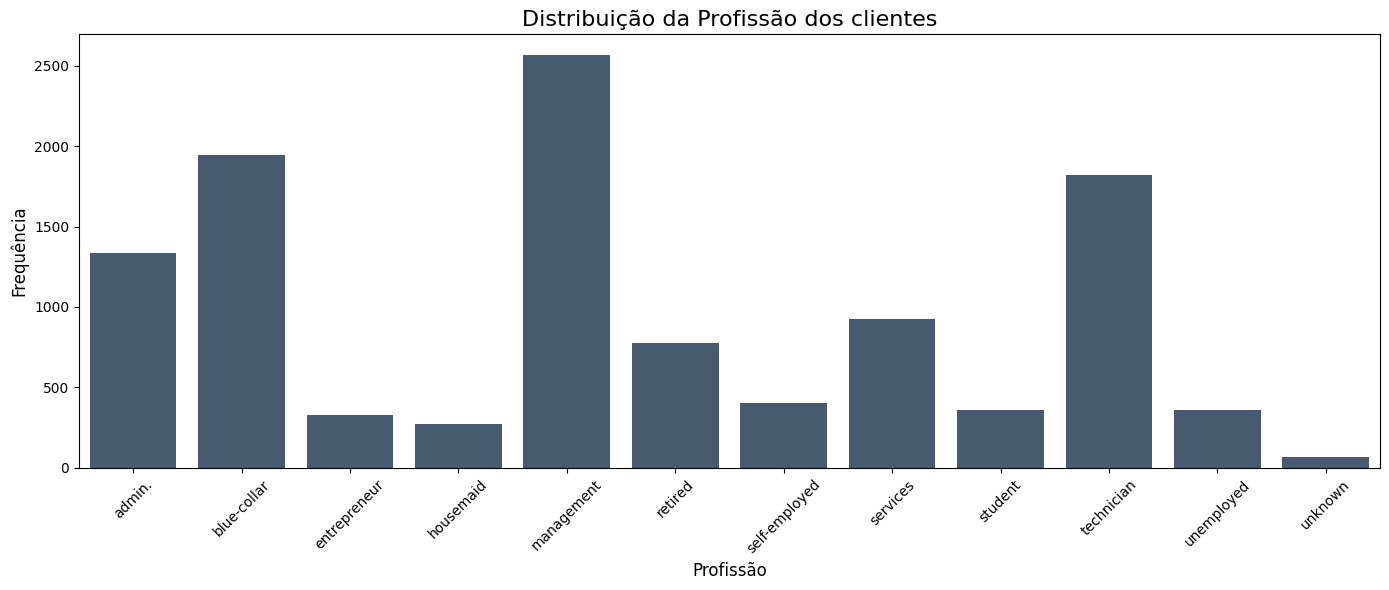

In [17]:
profissao = dados['job'].value_counts().sort_index()

plt.figure(figsize=(14, 6))  
sns.barplot(x=profissao.index, y=profissao.values, color='#415A77')
plt.title('Distribuição da Profissão dos clientes', fontsize=16)
plt.xlabel('Profissão', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

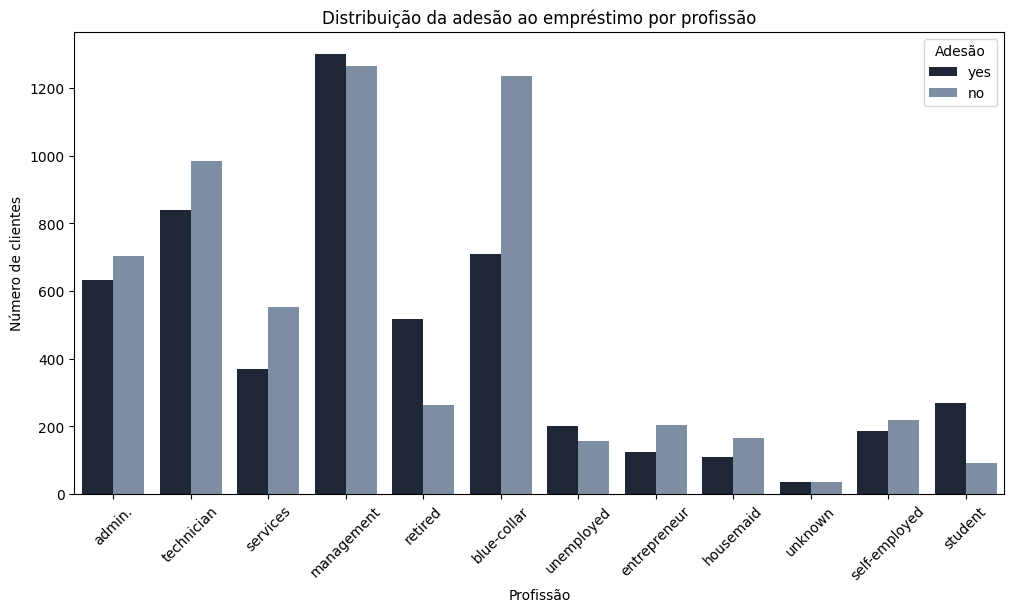

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=dados, x='job', hue='deposit',palette = ['#1B263B','#778DA9'])
plt.xlabel('Profissão')
plt.ylabel('Número de clientes')
plt.title('Distribuição da adesão ao empréstimo por profissão')
plt.legend(title='Adesão')
plt.xticks(rotation=45)
plt.show()

<font color = 'milkblue'>

Com base na análise dos gráficos, observa-se que a profissão de gestor apresenta o maior número de ofertas de depósito a prazo, totalizando 2.566 clientes (aproximadamente 22,9% do total analisado), seguida pela categoria de operadores, com 1.944 clientes (cerca de 17,3%). Entre os gestores, verifica-se que 1.350 clientes aderiram ao produto, correspondendo a 52,6% desse grupo, enquanto 1.216 (47,4%) não aceitaram a oferta. No caso dos operadores, embora representem um contingente expressivo, a taxa de rejeição é mais elevada: dos 1.944 clientes, 1.200 (61,7%) não aderiram, enquanto apenas 744 (38,3%) optaram por investir no produto.

Esses resultados evidenciam diferenças significativas no comportamento de adesão entre os perfis profissionais, sugerindo que a ocupação pode exercer influência relevante na decisão de investimento.

</font>

* ### Analisando Variável 'marital'

In [19]:
dados['marital'].describe()

count       11162
unique          3
top       married
freq         6351
Name: marital, dtype: object

In [20]:
dados['marital'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: marital
Non-Null Count  Dtype 
--------------  ----- 
11162 non-null  object
dtypes: object(1)
memory usage: 87.3+ KB


In [21]:
dados['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [22]:
dados['marital'].value_counts().reset_index()

,marital,count
0,married,6351
1,single,3518
2,divorced,1293


C:\Users\lmr_b\AppData\Local\Temp\ipykernel_5660\674347887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estado_civil.index, y=estado_civil.values, palette = ['#1B263B','#415A77','#778DA9'])


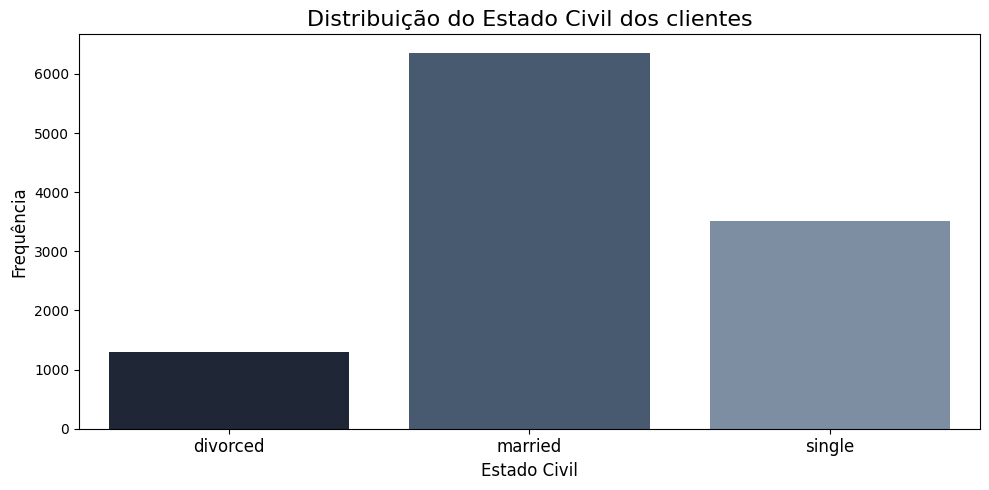

In [23]:
estado_civil = dados['marital'].value_counts().sort_index()
plt.figure(figsize=(10, 5))  
sns.barplot(x=estado_civil.index, y=estado_civil.values, palette = ['#1B263B','#415A77','#778DA9'])
plt.title('Distribuição do Estado Civil dos clientes', fontsize=16)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize = 12)
plt.tight_layout()
plt.show()

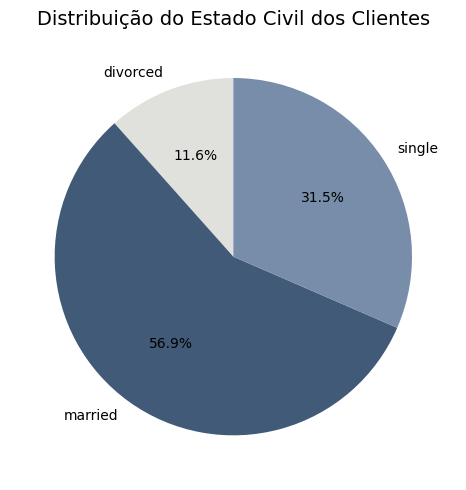

In [24]:
estado_civil = dados['marital'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.pie(
    estado_civil.values,
    labels=estado_civil.index,
    autopct='%1.1f%%',   # mostra os percentuais com 1 casa decimal
    startangle=90,       
    colors=['#E0E1DD','#415A77','#778DA9'])
plt.title('Distribuição do Estado Civil dos Clientes', fontsize=14)
plt.tight_layout()
plt.show()

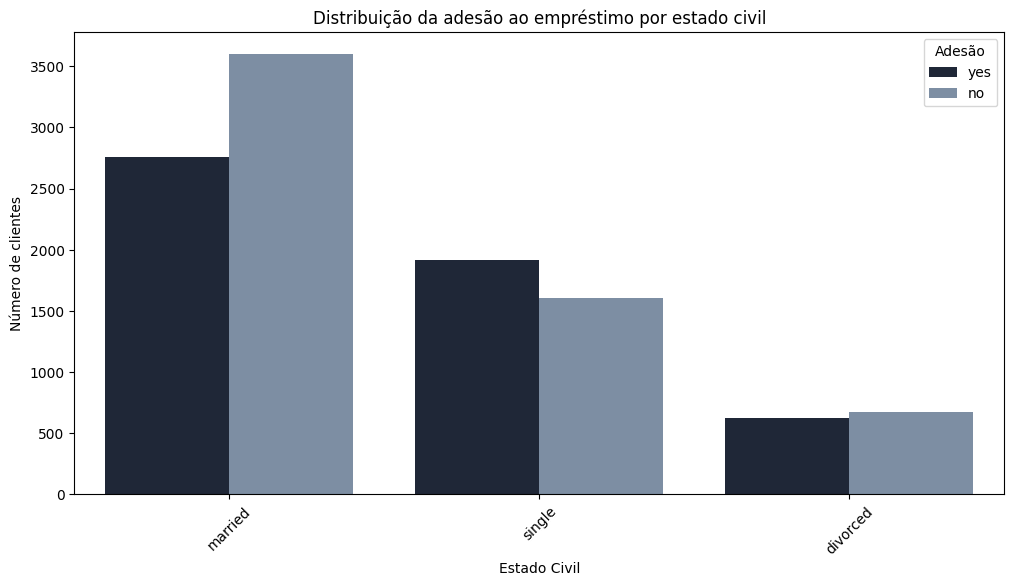

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=dados, x='marital', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Estado Civil')
plt.ylabel('Número de clientes')
plt.title('Distribuição da adesão ao empréstimo por estado civil')
plt.legend(title='Adesão')
plt.xticks(rotation=45)
plt.show()

<font color = 'milkblue'>

Com base na análise dos gráficos, observa-se que os clientes casados representam a maior parcela das ofertas de depósito a prazo, totalizando 6.351 indivíduos (56,9% do total). Em seguida, encontram-se os solteiros com 31,5%, enquanto os divorciados representam a menor proporção.
Entre os clientes casados que receberam a oferta, aproximadamente 2.750 aderiram ao produto, correspondendo a 43,3%, enquanto os 3.601 restantes (56,7%) não aceitaram investir.

</font>

* ### Analisando Variável 'education'

In [26]:
dados['education'].describe()

count         11162
unique            4
top       secondary
freq           5476
Name: education, dtype: object

In [27]:
dados['education'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: education
Non-Null Count  Dtype 
--------------  ----- 
11162 non-null  object
dtypes: object(1)
memory usage: 87.3+ KB


In [28]:
dados['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [29]:
dados['education'].value_counts().reset_index()

,education,count
0,secondary,5476
1,tertiary,3689
2,primary,1500
3,unknown,497


C:\Users\lmr_b\AppData\Local\Temp\ipykernel_5660\492993711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=escolaridade.index, y=escolaridade.values, palette = ['#1B263B','#415A77','#778DA9'])
C:\Users\lmr_b\AppData\Local\Temp\ipykernel_5660\492993711.py:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=escolaridade.index, y=escolaridade.values, palette = ['#1B263B','#415A77','#778DA9'])


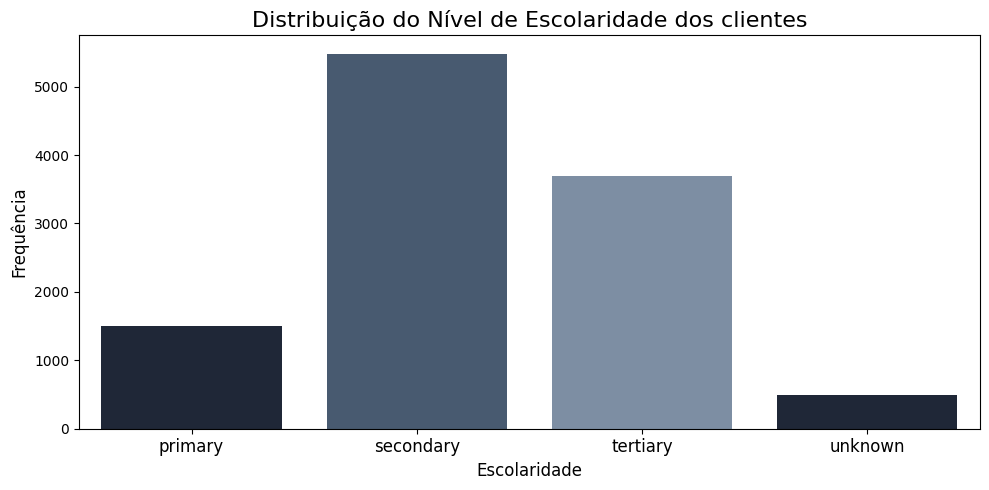

In [30]:
escolaridade = dados['education'].value_counts().sort_index()
plt.figure(figsize=(10, 5))  
sns.barplot(x=escolaridade.index, y=escolaridade.values, palette = ['#1B263B','#415A77','#778DA9'])
plt.title('Distribuição do Nível de Escolaridade dos clientes', fontsize=16)
plt.xlabel('Escolaridade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize = 12)
plt.tight_layout()
plt.show()

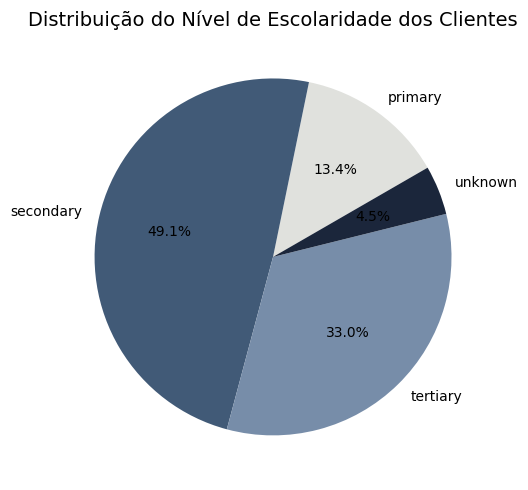

In [31]:
escolaridade = dados['education'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.pie(
    escolaridade.values,
    labels=escolaridade.index,
    autopct='%1.1f%%',
    startangle=30,       
    colors=['#E0E1DD','#415A77','#778DA9','#1B263B'])
plt.title('Distribuição do Nível de Escolaridade dos Clientes', fontsize=14)
plt.tight_layout()
plt.show()

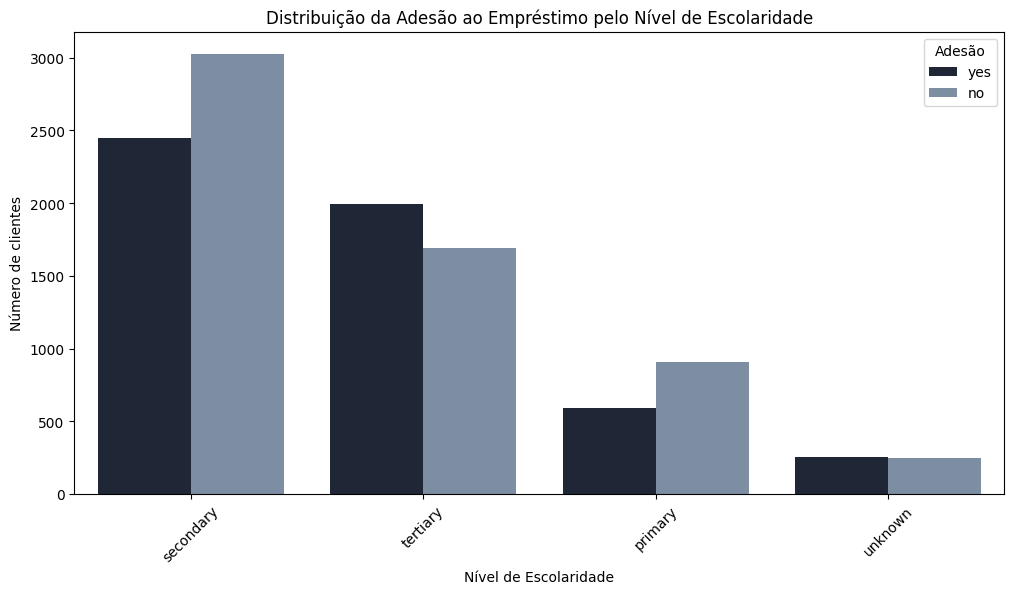

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data=dados, x='education', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Número de clientes')
plt.title('Distribuição da Adesão ao Empréstimo pelo Nível de Escolaridade')
plt.legend(title='Adesão')
plt.xticks(rotation=45)
plt.show()

<font color = 'milkblue'>

Com base na análise dos gráficos, verifica-se que os clientes com nível de escolaridade secundário (ensino médio) representam a maior parcela das ofertas de depósito a prazo, totalizando 5.476 indivíduos, o que equivale a 49,1% do conjunto analisado. Em seguida, destacam-se os clientes com nível terciário (ensino superior), correspondendo a 33,0%, enquanto aqueles com nível primário representam 13,4%. Já os clientes que não informaram a escolaridade compõem apenas 4,5% do total.
No grupo de clientes com nível secundário, observa-se que aproximadamente 2.450 aderiram ao produto, o que corresponde a 44,7%, enquanto 3.026 (55,3%) não aceitaram investir.
Esses resultados evidenciam que, para o banco, os clientes com ensino médio constituem o segmento mais expressivo em termos de volume de ofertas.

</font>

* ### Analisando Variável 'default'

In [33]:
dados['default'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: default
Non-Null Count  Dtype 
--------------  ----- 
11162 non-null  object
dtypes: object(1)
memory usage: 87.3+ KB


In [34]:
dados['default'].describe()

count     11162
unique        2
top          no
freq      10994
Name: default, dtype: object

In [35]:
dados['default'].value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

default - inadiplência em crédito

C:\Users\lmr_b\AppData\Local\Temp\ipykernel_5660\859660084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadiplencia_credito.index, y=inadiplencia_credito.values, palette = ['#1B263B','#778DA9'])


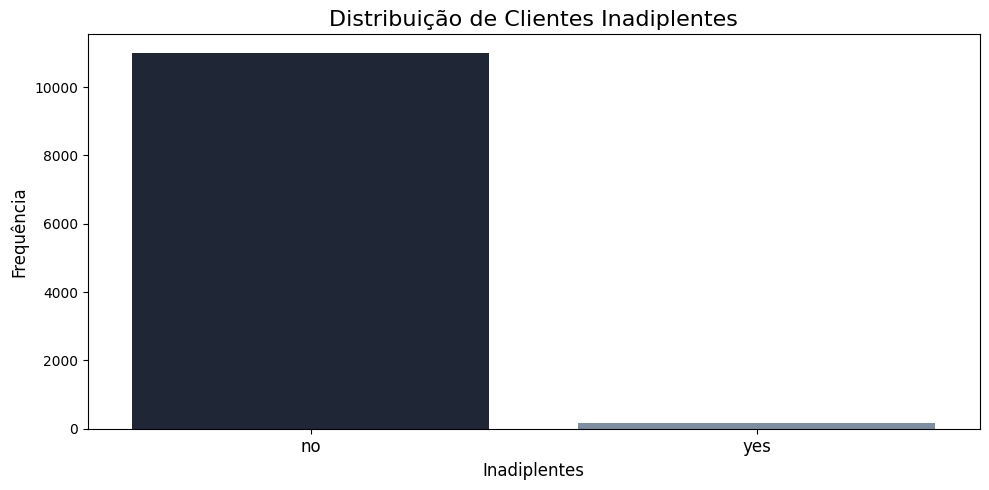

In [36]:
inadiplencia_credito = dados['default'].value_counts().sort_index()
plt.figure(figsize=(10, 5))  
sns.barplot(x=inadiplencia_credito.index, y=inadiplencia_credito.values, palette = ['#1B263B','#778DA9'])
plt.title('Distribuição de Clientes Inadiplentes', fontsize=16)
plt.xlabel('Inadiplentes', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize = 12)
plt.tight_layout()
plt.show()

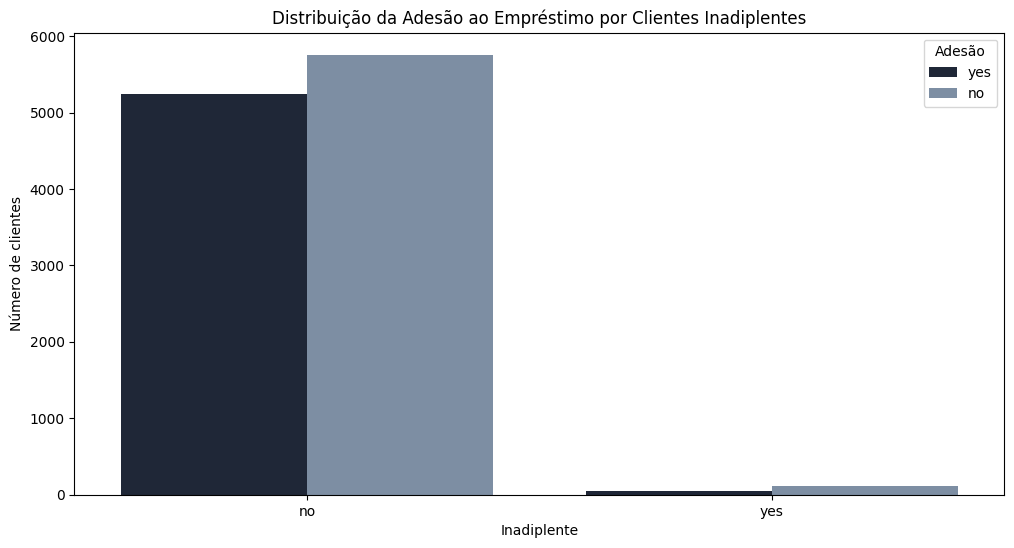

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(data=dados, x='default', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Inadiplente')
plt.ylabel('Número de clientes')
plt.title('Distribuição da Adesão ao Empréstimo por Clientes Inadiplentes')
plt.legend(title='Adesão')
plt.show()

<font color = 'milkblue'>

Com base na análise dos gráficos, observa-se que apenas 168 clientes apresentam inadimplência, o que corresponde a 1,5% do total de clientes que receberam a oferta de depósito a prazo, enquanto os 10.994 restantes (98,5%) não apresentam histórico de inadimplência.
No que se refere à adesão, entre os 10.994 clientes sem histórico de inadimplência que receberam a oferta, aproximadamente 5.100 (46,4%) aderiram ao produto, enquanto a maioria optou por não investir.
Esse resultado evidencia que o banco concentra suas ofertas majoritariamente em clientes financeiramente confiáveis, reduzindo riscos e garantindo maior segurança quanto ao retorno do investimento.
</font>

* ### Analisando Variável 'balance'

In [38]:
dados['balance'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: balance
Non-Null Count  Dtype
--------------  -----
11162 non-null  int64
dtypes: int64(1)
memory usage: 87.3 KB


In [39]:
dados['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [40]:
dados['balance'].value_counts().reset_index()

,balance,count
0,0,774
1,1,39
2,3,35
3,2,34
4,4,29
...,...,...
3800,4576,1
3801,-132,1
3802,-159,1
3803,8585,1


C:\Users\lmr_b\AppData\Local\Temp\ipykernel_5660\3246555654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=saldo_medio_anual.index, y=saldo_medio_anual.values, palette = ['#1B263B','#778DA9'])
C:\Users\lmr_b\AppData\Local\Temp\ipykernel_5660\3246555654.py:3: UserWarning: 
The palette list has fewer values (2) than needed (3805) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=saldo_medio_anual.index, y=saldo_medio_anual.values, palette = ['#1B263B','#778DA9'])


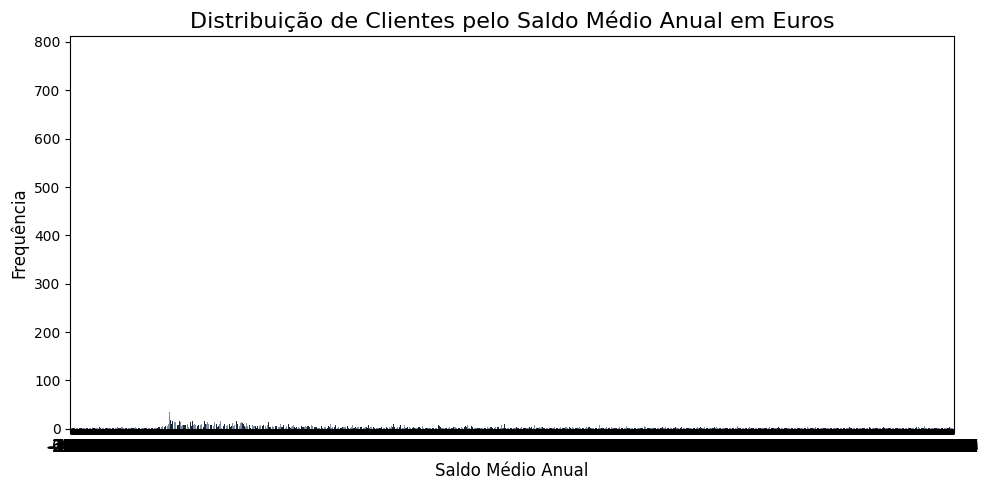

In [41]:
saldo_medio_anual = dados['balance'].value_counts().sort_index()
plt.figure(figsize=(10, 5))  
sns.barplot(x=saldo_medio_anual.index, y=saldo_medio_anual.values, palette = ['#1B263B','#778DA9'])
plt.title('Distribuição de Clientes pelo Saldo Médio Anual em Euros', fontsize=16)
plt.xlabel('Saldo Médio Anual', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize = 12)
plt.tight_layout()
plt.show()

<font color = 'milkblue'>
Com base no gráfico apresentado, observa-se que a visualização encontra-se comprometida devido à elevada quantidade de valores únicos no dataset, o que resultou em um gráfico poluído e de difícil interpretação. Diante disso, serão aplicadas outras técnicas de visualização a fim de representar de forma mais clara e objetiva os valores do saldo médio anual dos clientes do banco.
</font>

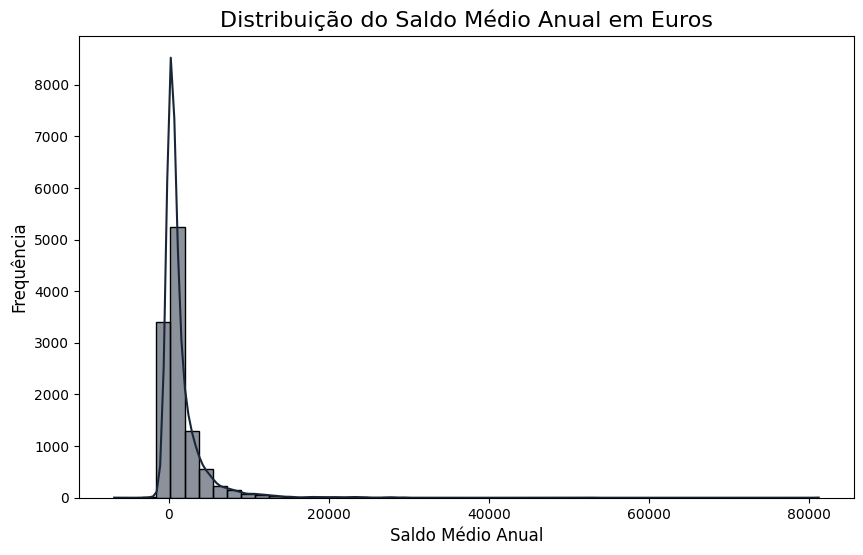

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(dados['balance'], bins=50, kde=True, color="#182638")
plt.title("Distribuição do Saldo Médio Anual em Euros", fontsize=16)
plt.xlabel("Saldo Médio Anual", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()

<font color = 'milkblue'>
No gráfico acima, a visualização apresenta uma melhoria em relação à anterior, evidenciando que a maior concentração de valores encontra-se na faixa negativa próxima a zero e se estende até aproximadamente 10.000. Contudo, ainda não é possível identificar com clareza as diferentes distribuições de valores. Assim, como Cientista de Dados, entendo que uma abordagem mais adequada seria a categorização dos saldos médios anuais em faixas, tais como: valores negativos; até 1.000; de 1.000 a 5.000; de 5.000 a 10.000; e acima de 10.000, de forma a possibilitar uma análise mais estruturada e interpretativa.
</font>

C:\Users\lmr_b\AppData\Local\Temp\ipykernel_5660\2674703885.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="faixa_saldo", data=dados, palette= ['#1B263B','#415A77','#778DA9','#E0E1DD'])
C:\Users\lmr_b\AppData\Local\Temp\ipykernel_5660\2674703885.py:5: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="faixa_saldo", data=dados, palette= ['#1B263B','#415A77','#778DA9','#E0E1DD'])


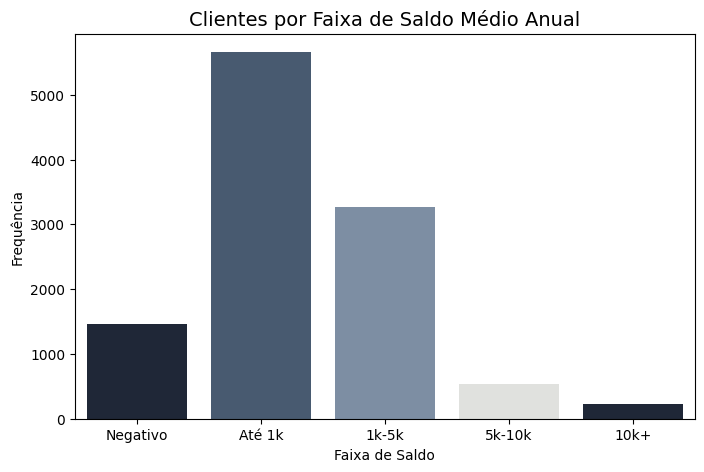

In [43]:
bins = [-2000, 0, 1000, 5000, 10000, 50000]
labels = ["Negativo", "Até 1k", "1k-5k", "5k-10k", "10k+"]
dados["faixa_saldo"] = pd.cut(dados["balance"], bins=bins, labels=labels)
plt.figure(figsize=(8,5))
sns.countplot(x="faixa_saldo", data=dados, palette= ['#1B263B','#415A77','#778DA9','#E0E1DD'])
plt.title("Clientes por Faixa de Saldo Médio Anual", fontsize=14)
plt.xlabel("Faixa de Saldo")
plt.ylabel("Frequência")
plt.show()

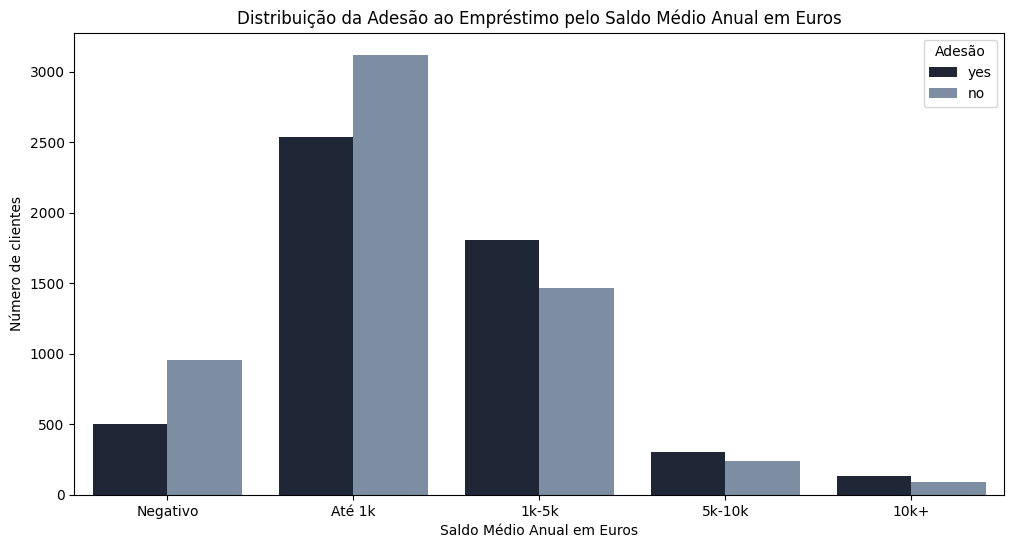

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(data=dados, x='faixa_saldo', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Saldo Médio Anual em Euros')
plt.ylabel('Número de clientes')
plt.title('Distribuição da Adesão ao Empréstimo pelo Saldo Médio Anual em Euros')
plt.legend(title='Adesão')
plt.show()

<font color = 'milkblue'>

No gráfico acima, é possível observar que, entre os depósitos a prazo ofertados, os clientes com saldo médio de até €1.000 representam o maior volume de ofertas e também a maior adesão, com aproximadamente 2.600 clientes aceitando investir no produto. Em contrapartida, mais de 3.000 clientes dessa faixa de saldo optam por não aderir.
Também é possível notar que ofertas são realizadas a clientes com saldo negativo, sendo que cerca de 500 deles aceitam a proposta. Isso sugere que esses clientes veem o depósito a prazo como uma oportunidade de aplicar pequenas quantias, mesmo com saldo reduzido, buscando rentabilidade ou organizar melhor suas finanças.

</font>

* ### Analisando Variável 'housing'

In [45]:
dados['housing'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: housing
Non-Null Count  Dtype 
--------------  ----- 
11162 non-null  object
dtypes: object(1)
memory usage: 87.3+ KB


In [46]:
dados['housing'].describe()

count     11162
unique        2
top          no
freq       5881
Name: housing, dtype: object

In [47]:
dados['housing'].value_counts()

housing
no     5881
yes    5281
Name: count, dtype: int64

C:\Users\lmr_b\AppData\Local\Temp\ipykernel_5660\3122606515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emprestimo_habitacional.index, y=emprestimo_habitacional.values, palette = ['#1B263B','#778DA9'])


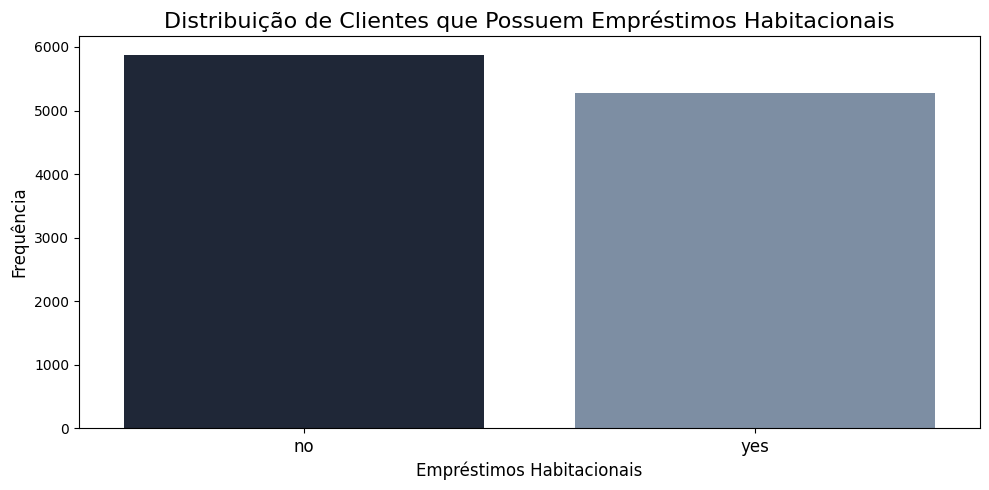

In [48]:
emprestimo_habitacional = dados['housing'].value_counts().sort_index()
plt.figure(figsize=(10, 5))  
sns.barplot(x=emprestimo_habitacional.index, y=emprestimo_habitacional.values, palette = ['#1B263B','#778DA9'])
plt.title('Distribuição de Clientes que Possuem Empréstimos Habitacionais', fontsize=16)
plt.xlabel('Empréstimos Habitacionais', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize = 12)
plt.tight_layout()
plt.show()

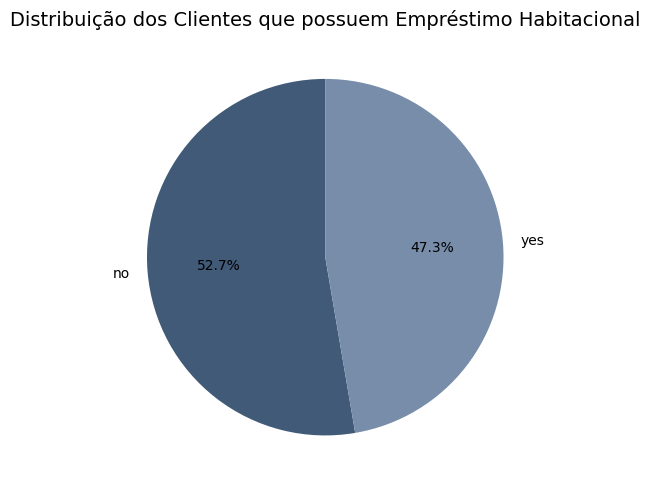

In [49]:
emprestimo_habitacional = dados['housing'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.pie(
    emprestimo_habitacional.values,
    labels=emprestimo_habitacional.index,
    autopct='%1.1f%%',
    startangle=90,       
    colors=['#415A77','#778DA9'])
plt.title('Distribuição dos Clientes que possuem Empréstimo Habitacional', fontsize=14)
plt.tight_layout()
plt.show()

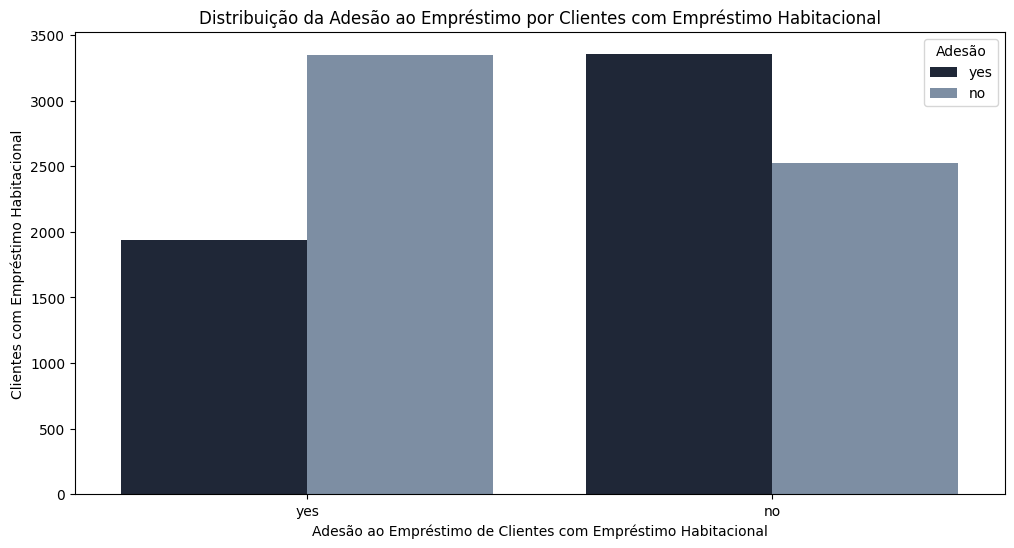

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(data=dados, x='housing', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Adesão ao Empréstimo de Clientes com Empréstimo Habitacional')
plt.ylabel('Clientes com Empréstimo Habitacional')
plt.title('Distribuição da Adesão ao Empréstimo por Clientes com Empréstimo Habitacional')
plt.legend(title='Adesão')
plt.show()

<font color = 'milkblue'>

Após a análise dos gráficos apresentados, observa-se que, de um total de 11.162 ofertas de depósito a prazo realizadas a clientes, 5.281 correspondem a indivíduos que já possuem um investimento ativo, representando 47,3% do total.
Ao examinar o gráfico de adesão, verifica-se que, desses 5.281 clientes, aproximadamente 1.900 aderiram ao novo produto, enquanto cerca de 3.300 optaram por não investir.
O elevado índice de rejeição pode ser atribuído à cautela dos clientes em realizar novos investimentos, considerando que já possuem um compromisso financeiro ativo em seu nome.

</font>

* ### Analisando Variável 'loan'

In [51]:
dados['loan'].describe()

count     11162
unique        2
top          no
freq       9702
Name: loan, dtype: object

In [52]:
dados['loan'].value_counts()

loan
no     9702
yes    1460
Name: count, dtype: int64

C:\Users\lmr_b\AppData\Local\Temp\ipykernel_5660\3152317851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emprestimo_pessoal.index, y=emprestimo_pessoal.values, palette = ['#1B263B','#778DA9'])


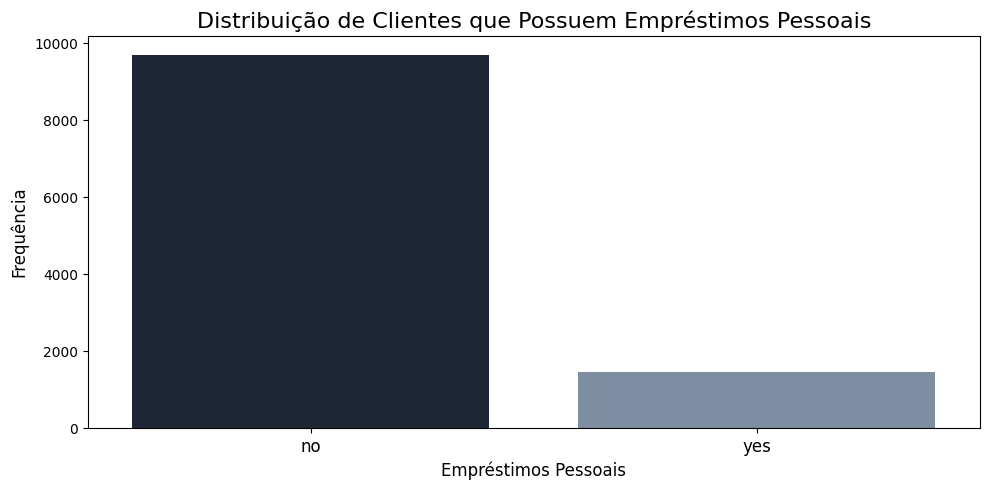

In [53]:
emprestimo_pessoal = dados['loan'].value_counts().sort_index()
plt.figure(figsize=(10, 5))  
sns.barplot(x=emprestimo_pessoal.index, y=emprestimo_pessoal.values, palette = ['#1B263B','#778DA9'])
plt.title('Distribuição de Clientes que Possuem Empréstimos Pessoais', fontsize=16)
plt.xlabel('Empréstimos Pessoais', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize = 12)
plt.tight_layout()
plt.show()

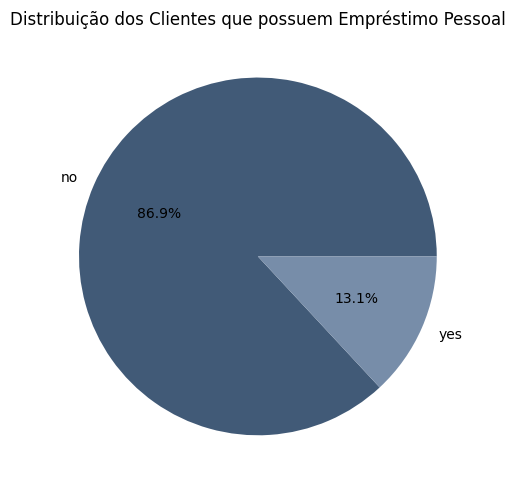

In [54]:
emprestimo_pessoal = dados['loan'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.pie(
    emprestimo_pessoal.values,
    labels=emprestimo_pessoal.index,
    autopct='%1.1f%%',       
    colors=['#415A77','#778DA9'])
plt.title('Distribuição dos Clientes que possuem Empréstimo Pessoal', fontsize=12)
plt.tight_layout()
plt.show()

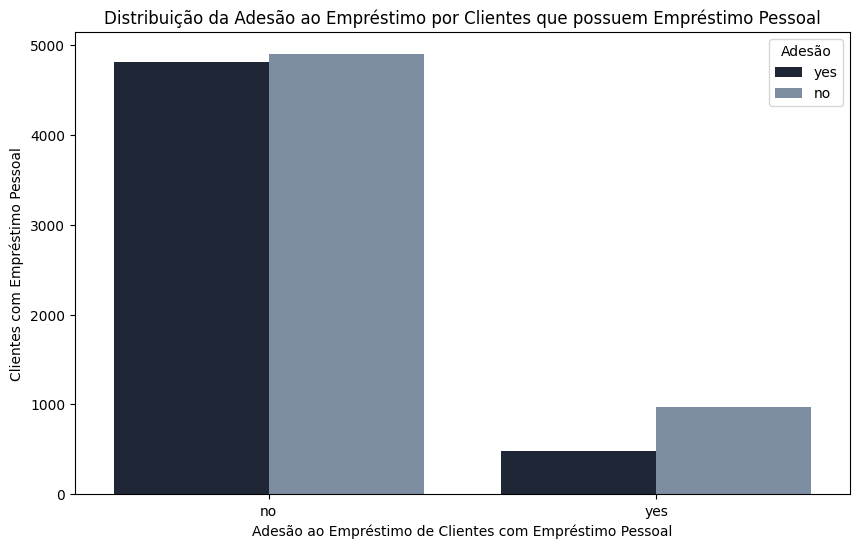

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(data=dados, x='loan', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Adesão ao Empréstimo de Clientes com Empréstimo Pessoal')
plt.ylabel('Clientes com Empréstimo Pessoal')
plt.title('Distribuição da Adesão ao Empréstimo por Clientes que possuem Empréstimo Pessoal')
plt.legend(title='Adesão')
plt.show()

<font color = 'milkblue'>

Após a análise dos gráficos apresentados, verifica-se que, do total de ofertas de depósito a prazo, apenas 13,1% dos clientes já possuem algum investimento ativo.
Dessa forma, observa-se que aproximadamente 500 clientes aderiram ao produto oferecido pelo Banco Aurora.

</font>

* ### Analisando Variável 'contact'

In [56]:
dados['contact'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: contact
Non-Null Count  Dtype 
--------------  ----- 
11162 non-null  object
dtypes: object(1)
memory usage: 87.3+ KB


In [57]:
dados['contact'].describe()

count        11162
unique           3
top       cellular
freq          8042
Name: contact, dtype: object

In [58]:
dados['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [59]:
dados['contact'].value_counts().reset_index()

,contact,count
0,cellular,8042
1,unknown,2346
2,telephone,774


C:\Users\lmr_b\AppData\Local\Temp\ipykernel_5660\1159743742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contato.index, y=contato.values, palette = ['#1B263B','#415A77','#778DA9'])


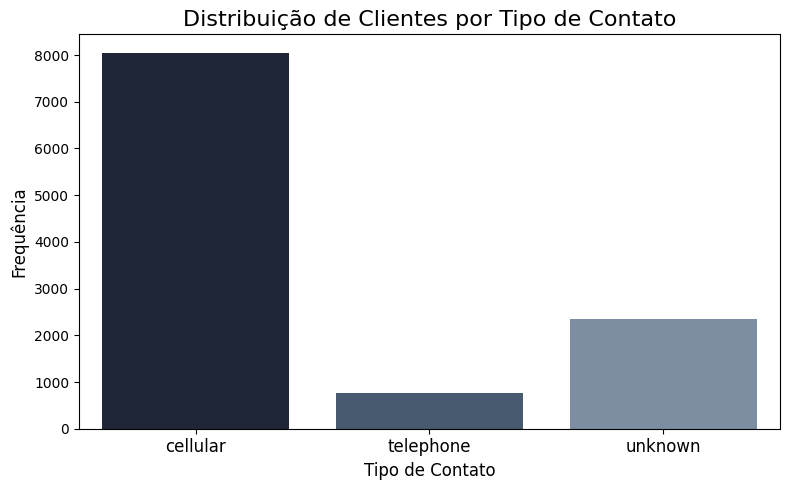

In [60]:
contato = dados['contact'].value_counts().sort_index()
plt.figure(figsize=(8, 5))  
sns.barplot(x=contato.index, y=contato.values, palette = ['#1B263B','#415A77','#778DA9'])
plt.title('Distribuição de Clientes por Tipo de Contato', fontsize=16)
plt.xlabel('Tipo de Contato', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize = 12)
plt.tight_layout()
plt.show()

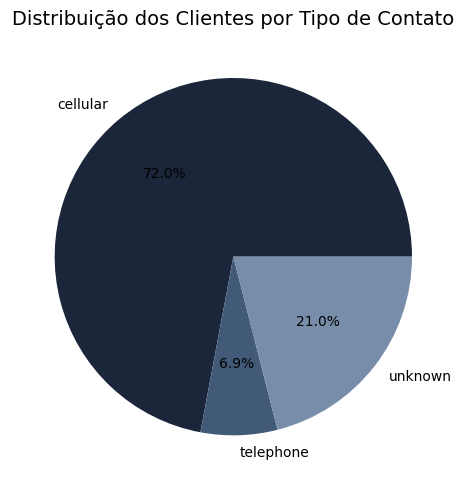

In [61]:
contato = dados['contact'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.pie(
    contato.values,
    labels=contato.index,
    autopct='%1.1f%%',       
    colors=['#1B263B','#415A77','#778DA9'])
plt.title('Distribuição dos Clientes por Tipo de Contato', fontsize=14)
plt.tight_layout()
plt.show()

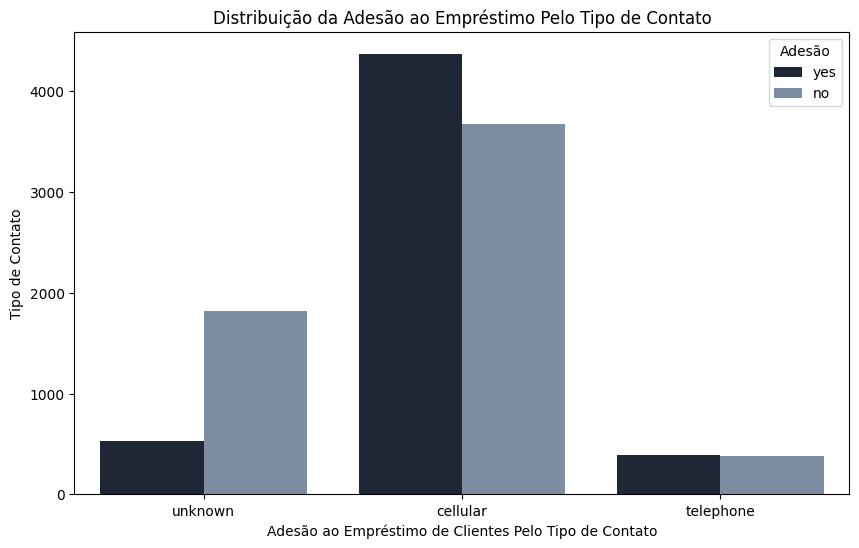

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(data=dados, x='contact', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Adesão ao Empréstimo de Clientes Pelo Tipo de Contato')
plt.ylabel('Tipo de Contato')
plt.title('Distribuição da Adesão ao Empréstimo Pelo Tipo de Contato')
plt.legend(title='Adesão')
plt.show()

<font color = 'milkblue'>

Após a análise dos gráficos apresentados, observa-se que o meio de contato mais utilizado pelo Banco Aurora é o celular, responsável por 8.042 clientes, o que corresponde a 72% do total.
Dentro desse grupo, aproximadamente 4.500 clientes aderiram ao depósito a prazo, representando cerca de 56% dos clientes contatados por celular.
Esse resultado evidencia que o celular é atualmente o canal de comunicação mais eficaz para a oferta de investimentos, apresentando maior taxa de adesão. Em contrapartida, o telefone fixo demonstra baixa efetividade, possivelmente devido ao seu uso reduzido e à preferência dos clientes por meios mais modernos de contato.

</font>

* ### Analisando Variável 'day'

In [63]:
dados['day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: day
Non-Null Count  Dtype
--------------  -----
11162 non-null  int64
dtypes: int64(1)
memory usage: 87.3 KB


In [64]:
dados['day'].describe()

count    11162.000000
mean        15.658036
std          8.420740
min          1.000000
25%          8.000000
50%         15.000000
75%         22.000000
max         31.000000
Name: day, dtype: float64

In [65]:
dados['day'].value_counts().head(10).reset_index()

,day,count
0,20,570
1,18,548
2,30,478
3,5,477
4,15,466
5,14,463
6,13,453
7,21,452
8,6,447
9,12,445


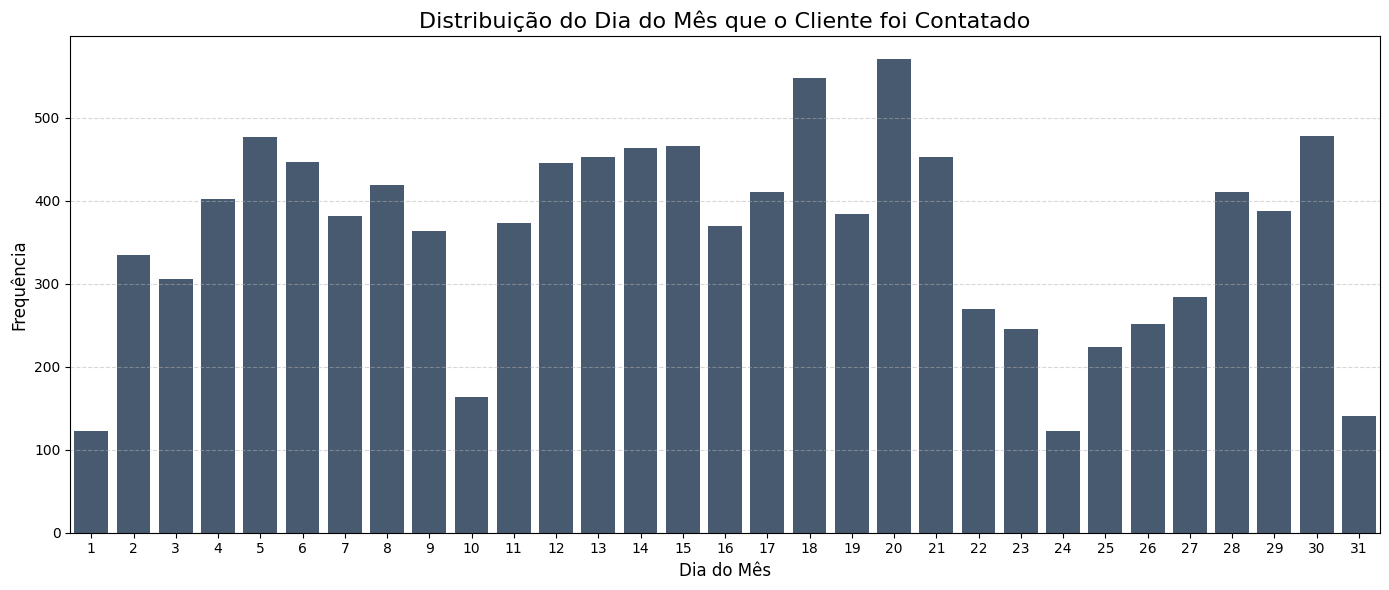

In [66]:
dia_contato = dados['day'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=dia_contato.index, y=dia_contato.values, color ='#415A77')
plt.title('Distribuição do Dia do Mês que o Cliente foi Contatado', fontsize=16)
plt.xlabel('Dia do Mês', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

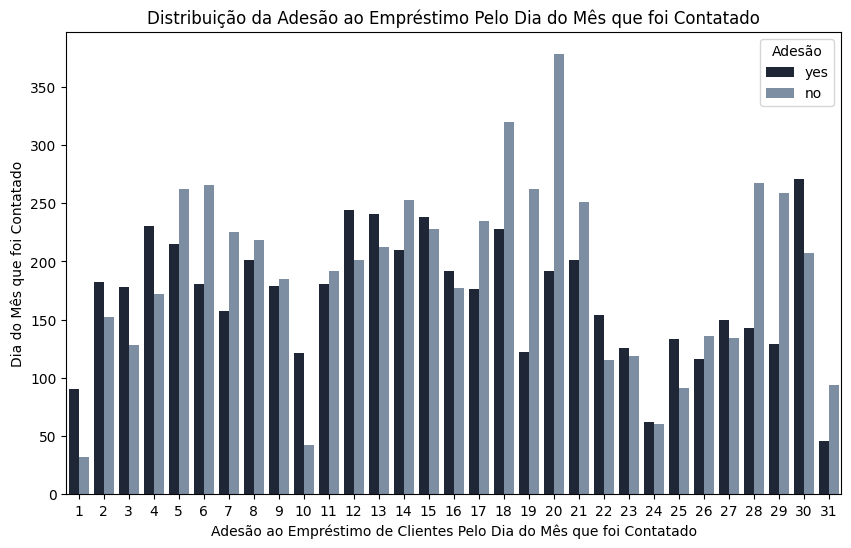

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(data=dados, x='day', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Adesão ao Empréstimo de Clientes Pelo Dia do Mês que foi Contatado')
plt.ylabel('Dia do Mês que foi Contatado')
plt.title('Distribuição da Adesão ao Empréstimo Pelo Dia do Mês que foi Contatado')
plt.legend(title='Adesão')
plt.show()

<font color = 'milkblue'>

O gráfico apresenta a distribuição da adesão ao depósito a prazo em função do dia do mês em que o cliente foi contatado. Observa-se uma concentração relativamente maior de adesões nos primeiros dias do mês, sobretudo entre os dias 1 e 5. Esse comportamento pode estar associado ao fato de que, nesse período, os clientes costumam receber seus salários e, paralelamente, lidar com vencimentos de despesas fixas, o que pode aumentar a predisposição em investir parte do dinheiro disponível.

Além disso, nota-se que, ao longo do restante do mês, a distribuição das adesões se mantém mais uniforme, sem grandes picos. Em contrapartida, os níveis de não adesão ao investimento permanecem elevados e relativamente estáveis em praticamente todos os dias, indicando que o dia do contato exerce influência parcial, mas não determinante, sobre a decisão final do cliente.

</font>

* ### Analisando Variável 'month'

In [68]:
dados['month'].describe()

count     11162
unique       12
top         may
freq       2824
Name: month, dtype: object

In [69]:
dados['month'].value_counts()

month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64

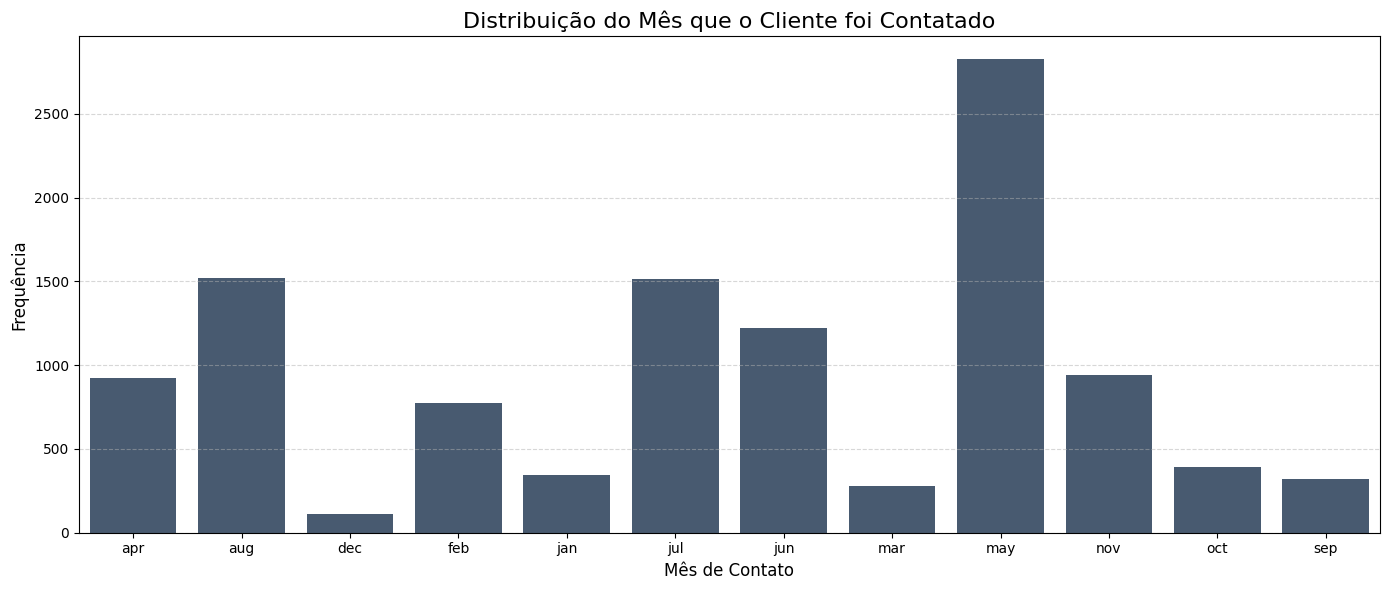

In [70]:
mes_contato = dados['month'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=mes_contato.index, y=mes_contato.values, color ='#415A77')
plt.title('Distribuição do Mês que o Cliente foi Contatado', fontsize=16)
plt.xlabel('Mês de Contato', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

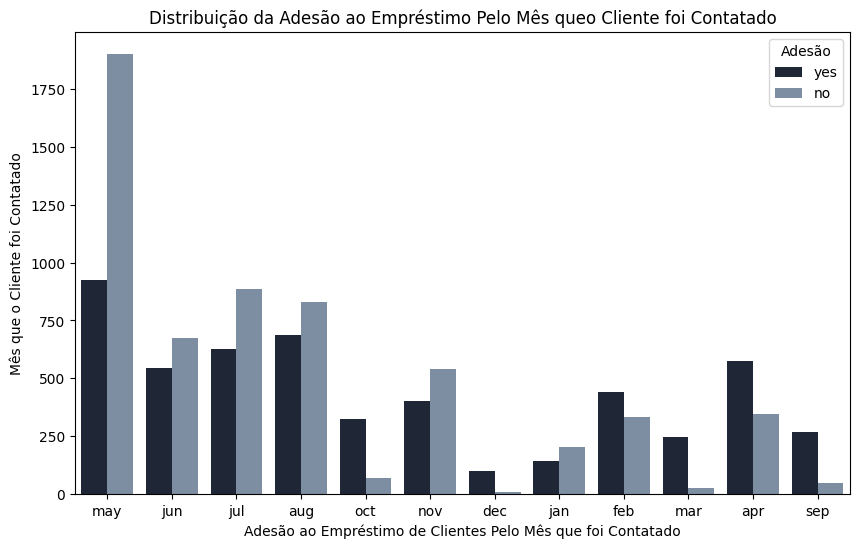

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(data=dados, x='month', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Adesão ao Empréstimo de Clientes Pelo Mês que foi Contatado')
plt.ylabel('Mês que o Cliente foi Contatado')
plt.title('Distribuição da Adesão ao Empréstimo Pelo Mês queo Cliente foi Contatado')
plt.legend(title='Adesão')
plt.show()

<font color = 'milkblue'>

A partir da análise dos gráficos apresentados, verifica-se que o mês com maior volume de ofertas de depósito a prazo pelo Banco Aurora é maio, totalizando 2.824 clientes contatados.

Dentro desse grupo, observa-se que cerca de 1.900 clientes (67,3%) não aderiram ao investimento, enquanto aproximadamente 900 clientes (31,9%) aderiram ao produto, configurando o maior número absoluto de adesões entre todos os meses analisados.

Esse resultado pode ser parcialmente explicado pelo elevado número de ofertas realizadas em maio, o que naturalmente eleva tanto a quantidade de não adesões quanto a de adesões. Ainda assim, destaca-se que, em termos proporcionais, a taxa de adesão permanece significativa, reforçando a relevância desse período para a estratégia de captação do banco.

</font>

* ### Analisando Variável 'duration'

In [72]:
dados['duration'].describe()

count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

In [73]:
dados['duration'].value_counts().reset_index()

,duration,count
0,97,39
1,161,38
2,119,37
3,150,37
4,158,37
...,...,...
1423,1529,1
1424,3,1
1425,702,1
1426,999,1


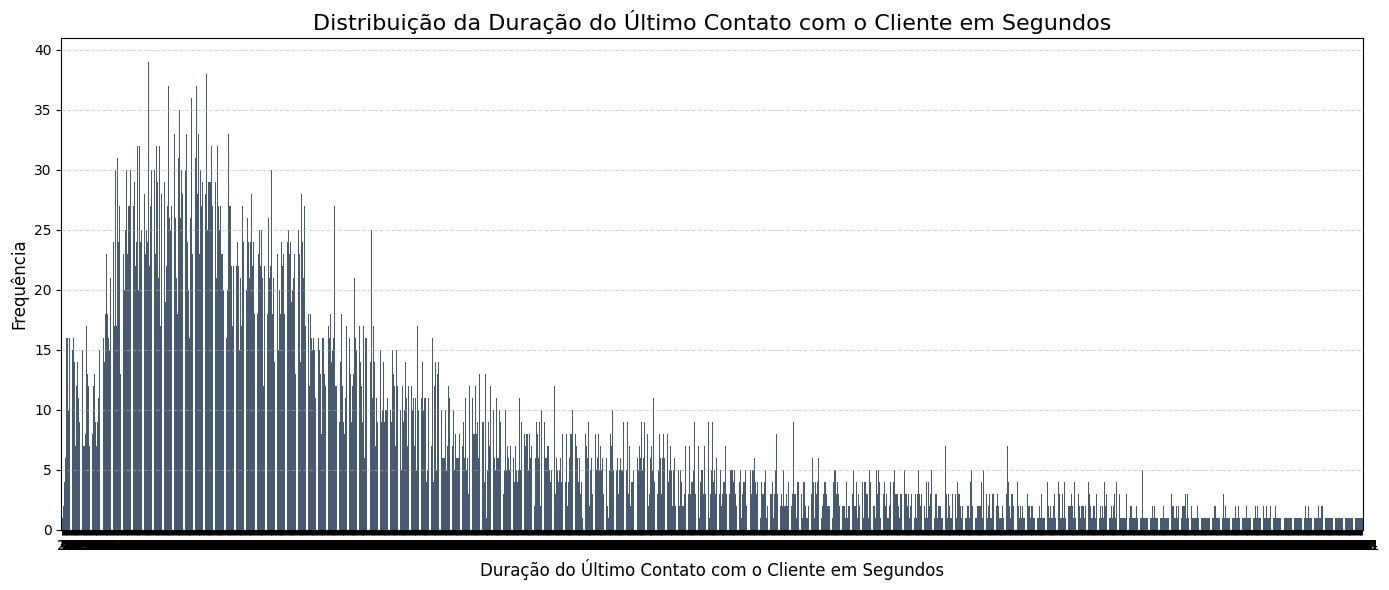

In [74]:
duracao_contato = dados['duration'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=duracao_contato.index, y=duracao_contato.values, color ='#415A77')
plt.title('Distribuição da Duração do Último Contato com o Cliente em Segundos', fontsize=16)
plt.xlabel('Duração do Último Contato com o Cliente em Segundos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<font color = 'milkblue'>
O gráfico acima, construído em segundos, apresentou grande poluição visual devido à alta quantidade de valores únicos na variável duration. Para melhorar a interpretação, irei converter a variável para minutos, que permitirá uma visualização mais clara e agrupada da distribuição da duração dos contatos.
</font>

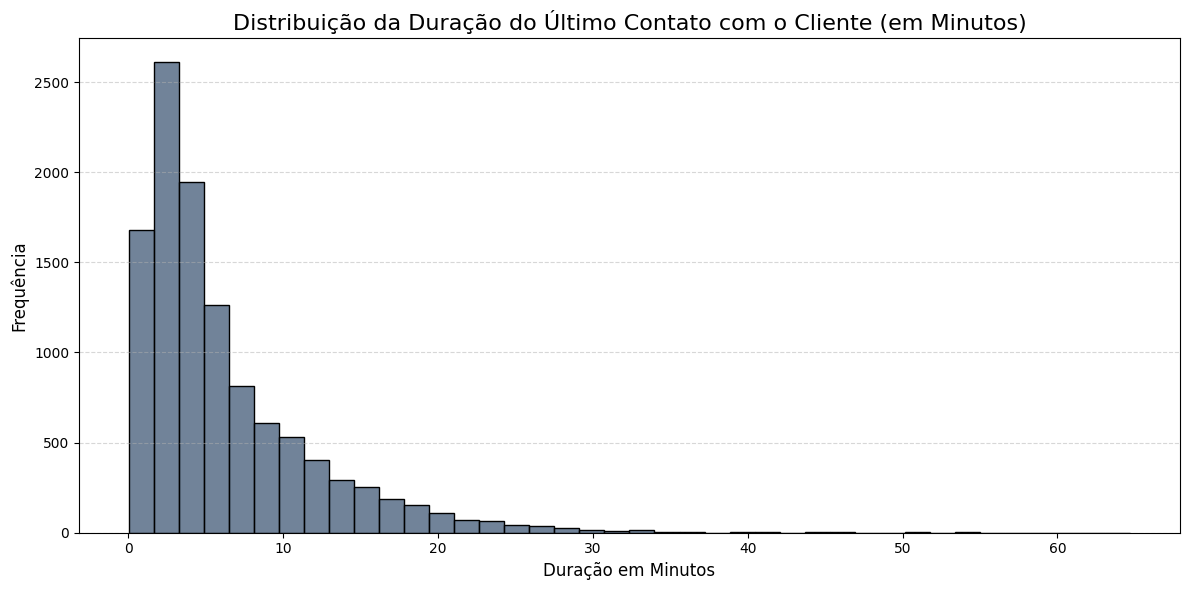

In [75]:
dados['duration_min'] = dados['duration'] / 60
plt.figure(figsize=(12,6))
sns.histplot(dados['duration_min'], bins=40, kde=False, color='#415A77')
plt.title('Distribuição da Duração do Último Contato com o Cliente (em Minutos)', fontsize=16)
plt.xlabel('Duração em Minutos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [76]:
dados['duration_min'].value_counts()

duration_min
1.616667     39
2.683333     38
1.983333     37
2.500000     37
2.633333     37
             ..
25.483333     1
0.050000      1
11.700000     1
16.650000     1
0.033333      1
Name: count, Length: 1428, dtype: int64

In [77]:
dados['duration_min'].describe()

count    11162.000000
mean         6.199897
std          5.785473
min          0.033333
25%          2.300000
50%          4.250000
75%          8.266667
max         64.683333
Name: duration_min, dtype: float64

<font color = 'milkblue'>
Com base no gráfico acima, cuja visualização foi aprimorada, observa-se que a duração dos últimos contatos foi relativamente curta, variando aproximadamente entre 1,6 minutos e 8,2 minutos.
</font>

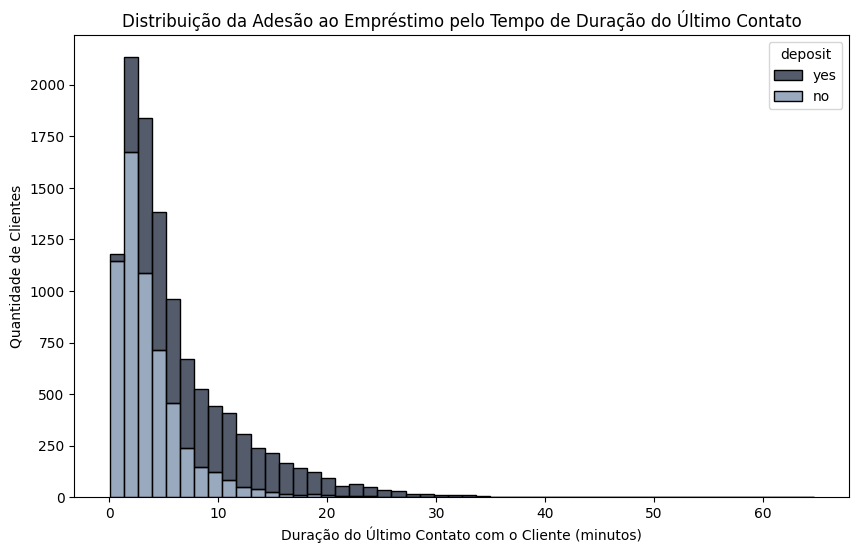

In [78]:
plt.figure(figsize=(10,6))
sns.histplot(data=dados, x='duration_min', hue='deposit', bins=50, palette=['#1B263B', '#778DA9'], multiple='stack')
plt.xlabel('Duração do Último Contato com o Cliente (minutos)')
plt.ylabel('Quantidade de Clientes')
plt.title('Distribuição da Adesão ao Empréstimo pelo Tempo de Duração do Último Contato')
plt.show()

<font color = 'milkblue'>

O gráfico mostra que a maioria dos contatos ocorre em até 5 minutos e, embora haja um número considerável de clientes que não aderem, observa-se que a adesão tende a aumentar conforme cresce a duração do contato. Isso pode ser atribuído ao cuidado e à experiência do funcionário que está oferecendo o depósito a prazo, demonstrando atenção e suporte adequados ao cliente.

</font>

* ### Analisando Variável 'campaign'

In [79]:
dados['campaign'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: campaign
Non-Null Count  Dtype
--------------  -----
11162 non-null  int64
dtypes: int64(1)
memory usage: 87.3 KB


In [80]:
dados['campaign'].describe()

count    11162.000000
mean         2.508421
std          2.722077
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [81]:
dados['campaign'].value_counts().head(20).reset_index()

,campaign,count
0,1,4798
1,2,3028
2,3,1321
3,4,771
4,5,378
5,6,265
6,7,139
7,8,128
8,9,72
9,10,52


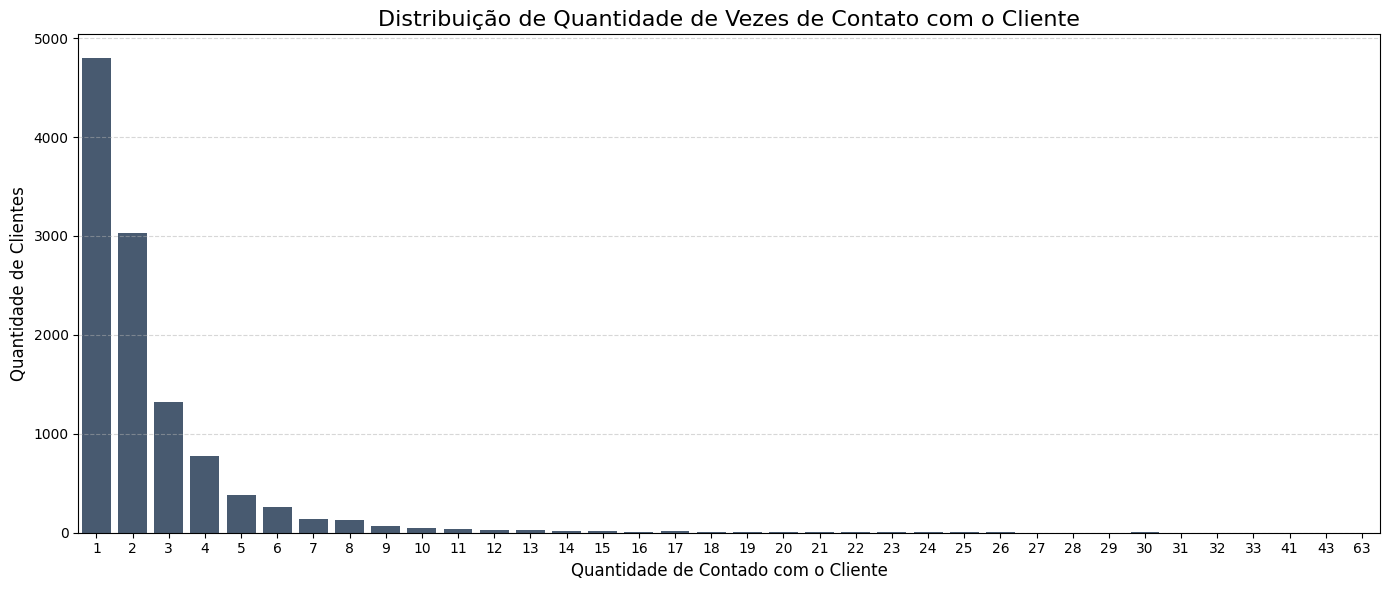

In [82]:
quantidade_contato = dados['campaign'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=quantidade_contato.index, y=quantidade_contato.values, color ='#415A77')
plt.title('Distribuição de Quantidade de Vezes de Contato com o Cliente', fontsize=16)
plt.xlabel('Quantidade de Contado com o Cliente', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

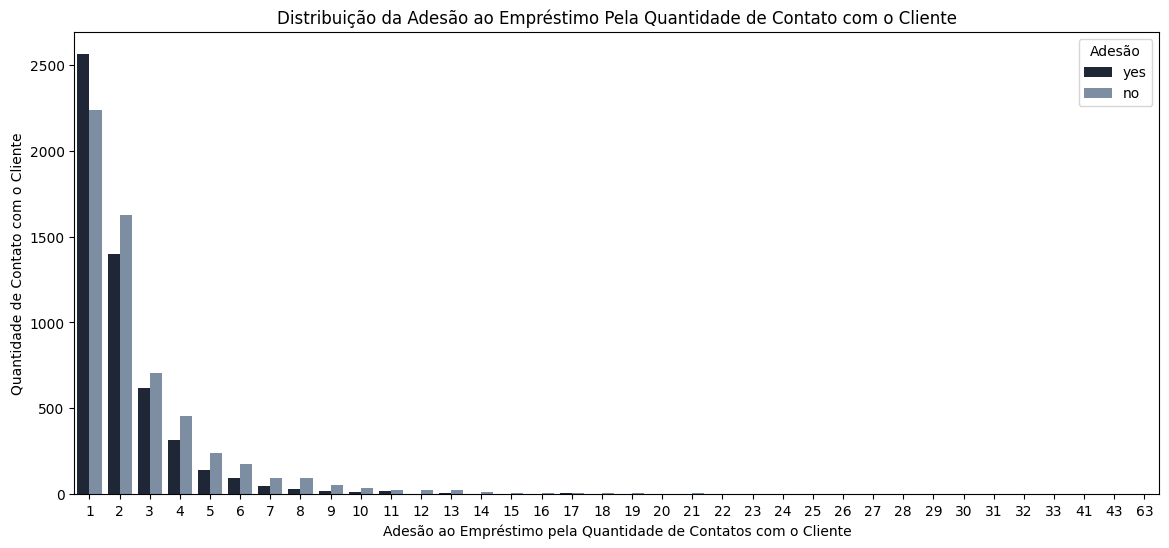

In [83]:
plt.figure(figsize=(14,6))
sns.countplot(data=dados, x='campaign', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Adesão ao Empréstimo pela Quantidade de Contatos com o Cliente')
plt.ylabel('Quantidade de Contato com o Cliente')
plt.title('Distribuição da Adesão ao Empréstimo Pela Quantidade de Contato com o Cliente')
plt.legend(title='Adesão')
plt.show()

<font color = 'milkblue'>
Após a análise dos gráficos, observa-se que a faixa de 1 a 5 contatos foi a mais predominante na campanha, destacando-se os clientes com apenas uma ligação, que representaram aproximadamente 4.800 pessoas. Além disso, verifica-se que entre esses clientes contatados apenas uma vez, houve uma adesão significativa de mais de 2.500 pessoas (em torno de 52%), evidenciando a efetividade desse primeiro contato.
Também é válido ressaltar que a concentração de ligação entre 1 e 5 vezes para a mesma pessoa pode ser relacionada a dúvidas frequentes de clientes. 
</font>

* ### Analisando Variável 'pdays'

In [84]:
dados['pdays'].describe()

count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64

In [85]:
dados['pdays'].value_counts().reset_index()

,pdays,count
0,-1,8324
1,92,106
2,182,89
3,91,84
4,181,81
...,...,...
467,651,1
468,214,1
469,24,1
470,701,1


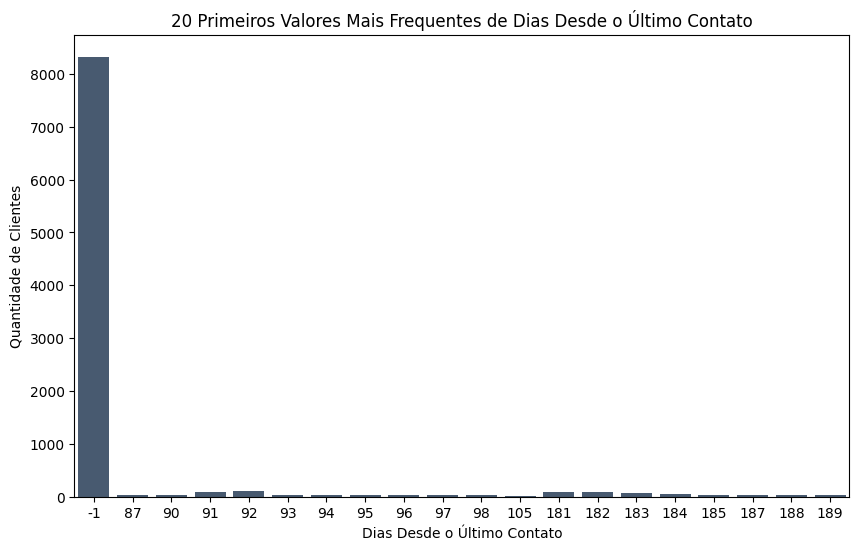

In [86]:
top_pdays = dados['pdays'].value_counts().nlargest(20)
plt.figure(figsize=(10,6))
sns.barplot(x=top_pdays.index, y=top_pdays.values, color='#415A77')
plt.xlabel('Dias Desde o Último Contato')
plt.ylabel('Quantidade de Clientes')
plt.title('20 Primeiros Valores Mais Frequentes de Dias Desde o Último Contato')
plt.show()

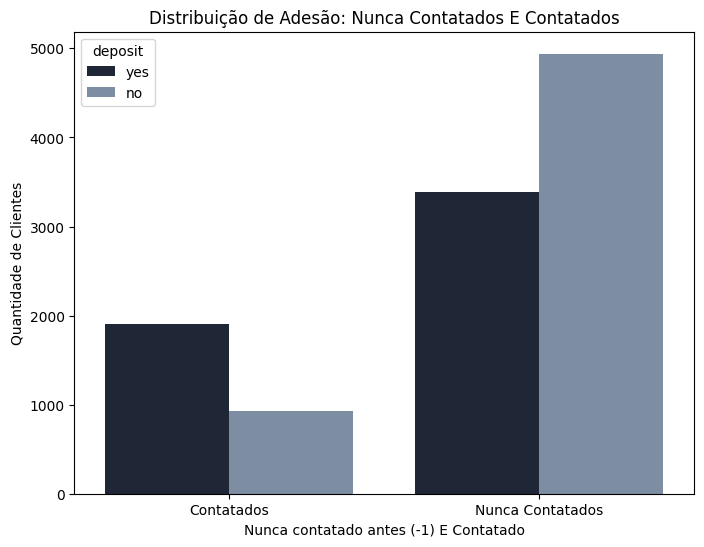

In [87]:
plt.figure(figsize=(8,6))
sns.countplot(data=dados, x=dados['pdays'] == -1, hue='deposit', palette=['#1B263B','#778DA9'])
plt.xlabel('Nunca contatado antes (-1) E Contatado')
plt.ylabel('Quantidade de Clientes')
plt.title('Distribuição de Adesão: Nunca Contatados E Contatados')
plt.xticks([0,1], ['Contatados', 'Nunca Contatados'])
plt.show()

<font color = 'milkblue'>

A análise dos gráficos evidencia que a maior parte dos clientes (mais de 8.000 registros) nunca havia sido contatada anteriormente, indicando que a campanha em questão foi, em grande medida, responsável pelo primeiro contato com esses indivíduos. Entre esse grupo, observa-se que aproximadamente 3.200 clientes aderiram ao depósito a prazo, enquanto cerca de 5.000 optaram por não investir.

Apesar da diferença entre os dois grupos, o volume de adesões entre clientes sem histórico prévio de contato pode ser considerado expressivo, reforçando a relevância dessa abordagem inicial para a captação de novos investidores.

</font>

* ### Analisando Variável 'previous'

In [88]:
dados['previous'].describe()

count    11162.000000
mean         0.832557
std          2.292007
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000
Name: previous, dtype: float64

In [89]:
dados['previous'].value_counts().head(20).reset_index()

,previous,count
0,0,8324
1,1,887
2,2,693
3,3,435
4,4,244
5,5,165
6,6,117
7,7,77
8,8,60
9,9,34


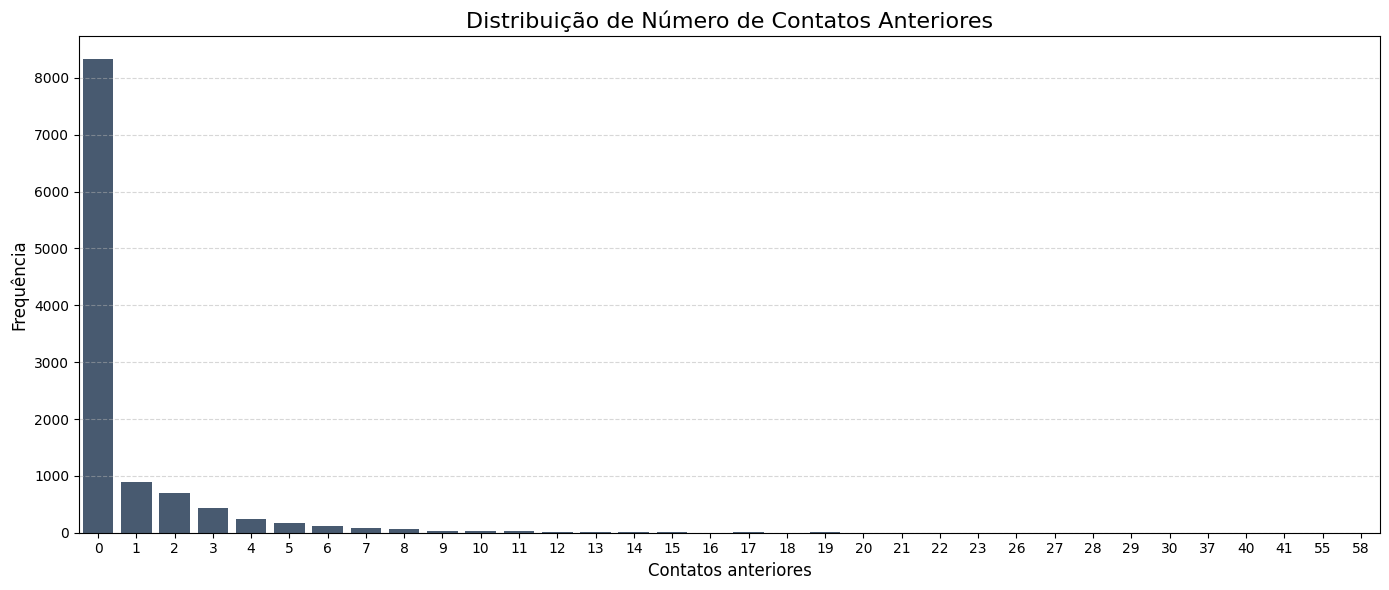

In [90]:
contatos_anteriores = dados['previous'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=contatos_anteriores.index, y=contatos_anteriores.values, color ='#415A77')
plt.title('Distribuição de Número de Contatos Anteriores', fontsize=16)
plt.xlabel('Contatos anteriores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

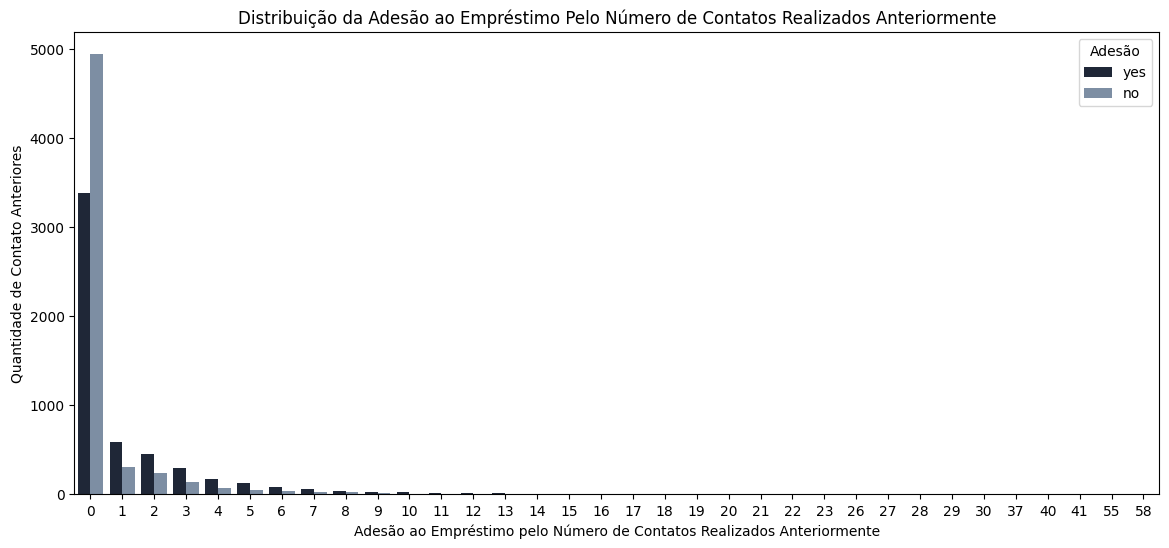

In [91]:
plt.figure(figsize=(14,6))
sns.countplot(data=dados, x='previous', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Adesão ao Empréstimo pelo Número de Contatos Realizados Anteriormente')
plt.ylabel('Quantidade de Contato Anteriores')
plt.title('Distribuição da Adesão ao Empréstimo Pelo Número de Contatos Realizados Anteriormente')
plt.legend(title='Adesão')
plt.show()

<font color = 'milkblue'>

A análise dos gráficos demonstra que uma parcela significativa dos clientes foi contatada pela primeira vez durante a campanha, totalizando 8.324 indivíduos nessa condição. Além disso, observa-se que clientes antigos não foram abordados de forma recorrente, uma vez que aqueles com intervalo superior a 30 dias desde o último contato apresentaram apenas uma interação ou sequer foram novamente contatados.

Essa situação pode representar uma oportunidade não explorada pelo Banco Aurora, que deixou de potencializar a campanha junto à sua base já existente de clientes, reduzindo, assim, a eficiência na fidelização e no aproveitamento do relacionamento prévio para novos investimentos.

</font>

* ### Analisando Variável 'poutcome'

In [92]:
dados['poutcome'].describe()

count       11162
unique          4
top       unknown
freq         8326
Name: poutcome, dtype: object

In [93]:
dados['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [94]:
dados['poutcome'].value_counts().reset_index()

,poutcome,count
0,unknown,8326
1,failure,1228
2,success,1071
3,other,537


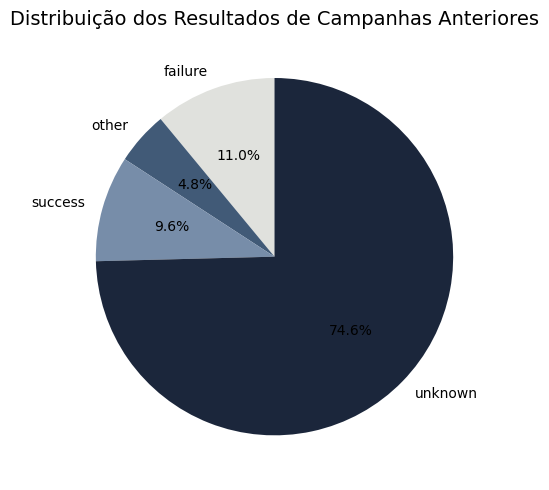

In [95]:
resultado_anterior = dados['poutcome'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.pie(
    resultado_anterior.values,
    labels=resultado_anterior.index,
    autopct='%1.1f%%',
    startangle=90,       
    colors=['#E0E1DD','#415A77','#778DA9','#1B263B'])
plt.title('Distribuição dos Resultados de Campanhas Anteriores', fontsize=14)
plt.tight_layout()
plt.show()

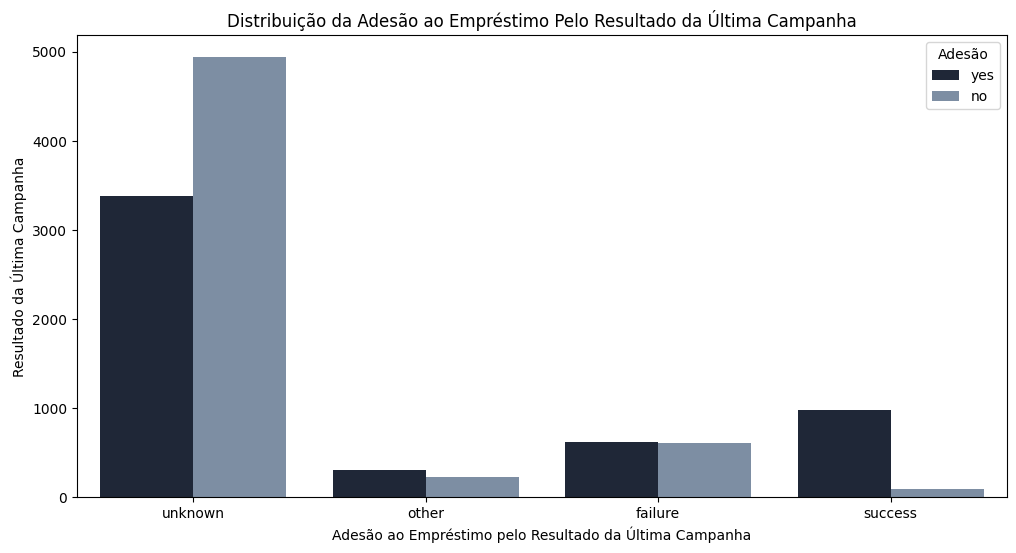

In [96]:
plt.figure(figsize=(12,6))
sns.countplot(data=dados, x='poutcome', hue='deposit', palette = ['#1B263B','#778DA9'])
plt.xlabel('Adesão ao Empréstimo pelo Resultado da Última Campanha')
plt.ylabel('Resultado da Última Campanha')
plt.title('Distribuição da Adesão ao Empréstimo Pelo Resultado da Última Campanha')
plt.legend(title='Adesão')
plt.show()

<font color = 'milkblue'>
A análise demonstra que 74,6% dos clientes não possuem histórico de campanhas anteriores, o que confirma que a maioria foi contatada pela primeira vez. Entre os clientes com registros, 9,6% tiveram sucesso e 11% insucesso em campanhas passadas. Esse cenário indica oportunidade de consolidar novos relacionamentos, ao mesmo tempo em que revela uma possível subutilização da base já engajada, que poderia apresentar maior propensão à adesão.
</font>

## 4. Preparação e Tratamento de Dados

In [97]:
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,faixa_saldo,duration_min
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1k-5k,17.366667
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,Até 1k,24.450000
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1k-5k,23.150000
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1k-5k,9.650000
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,Até 1k,11.216667


In [98]:
dados.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'faixa_saldo', 'duration_min'],
      dtype='object')

<font color = 'milkblue'>
Após Análise Exploratória de Dados dos valores fornecidos pelo Banco Aurora, vimos que os fatores que mais interferem a adesão de crédito antecipado(empréstimo) ao cliente são: 

 * Age
 * Job
 * Marital
 * Education
 * Default
 * Balance
 * Loan
 * Contact
 * Month
 * Campaign

Do meu ponto de vista como cientista de dados, iremos remover algumas colunas que não agregam valor ao modelo, com base nos insights obtidos durante a análise exploratória de dados.

</font>

In [99]:
dados_numerico = dados.drop(columns=['housing','day','duration','pdays','previous','poutcome','faixa_saldo','duration_min'])
dados_numerico

,age,job,marital,education,default,balance,loan,contact,month,campaign,deposit
0,59,admin.,married,secondary,no,2343,no,unknown,may,1,yes
1,56,admin.,married,secondary,no,45,no,unknown,may,1,yes
2,41,technician,married,secondary,no,1270,no,unknown,may,1,yes
3,55,services,married,secondary,no,2476,no,unknown,may,1,yes
4,54,admin.,married,tertiary,no,184,no,unknown,may,2,yes
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,no,cellular,apr,1,no
11158,39,services,married,secondary,no,733,no,unknown,jun,4,no
11159,32,technician,single,secondary,no,29,no,cellular,aug,2,no
11160,43,technician,married,secondary,no,0,yes,cellular,may,2,no


In [100]:
dados_numerico['deposit'].unique()

array(['yes', 'no'], dtype=object)

In [101]:
dados_numerico['deposit_numerico'] = dados['deposit'].map({'yes': 1, 'no' : 0})
dados_numerico['deposit_numerico'].unique()

array([1, 0])

In [102]:
dados_numerico['deposit_numerico'].value_counts()

deposit_numerico
0    5873
1    5289
Name: count, dtype: int64

## 5. Construção de modelo de classificação de Adesão ao Empréstimo

In [103]:
x_bank = dados_numerico.drop(['deposit_numerico', 'deposit'], axis=1)
y_bank = dados_numerico['deposit_numerico']

In [104]:
x_bank_train, x_bank_test, y_bank_train, y_bank_test = train_test_split(x_bank, y_bank,test_size=0.3, random_state=42)

* ### Realizando o Encoding nas Colunas Categóricas Selecionadas

<font color = 'milkblue'>
Realizo o Label Encoding apenas após a separação do conjunto de treino e teste para evitar vazamento de dados (data leakage).
Isso garante que o encoder aprende apenas as categorias presentes no treino, e o conjunto de teste é transformado com base nesse aprendizado, simulando o comportamento real do modelo em dados inéditos.
Dessa forma, a avaliação do modelo permanece justa e confiável, sem que informações do teste influenciem o treinamento.
</font>

In [105]:
# Lista de colunas categóricas
colunas_categ = ["job", "marital", "education", "default", "loan", "contact", "month"]

# Dicionário para armazenar os encoders
encoders = {}

# Aplicar Label Encoding em cada coluna
for col in colunas_categ:
    le = LabelEncoder()
    
    # Ajustar e transformar no treino
    x_bank_train[col] = le.fit_transform(x_bank_train[col])
    
    # Transformar no teste usando o mesmo encoder
    x_bank_test[col] = le.transform(x_bank_test[col])
    
    # Guardar o encoder para referência futura
    encoders[col] = le

* ### Modelo Random Forest

In [106]:
random_forest = RandomForestClassifier(n_estimators=3 , n_jobs = 1, random_state= 42)

In [107]:
random_forest.fit(x_bank_train , y_bank_train)

,n_estimators,3
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [108]:
random_forest.score(x_bank_train , y_bank_train)

0.9274286445667477

In [109]:
random_forest.score(x_bank_test , y_bank_test)

0.6294416243654822

In [110]:
y_pred_random_forest = random_forest.predict(x_bank_test)

In [111]:
acc = accuracy_score(y_bank_test, y_pred_random_forest)
prec = precision_score(y_bank_test, y_pred_random_forest)
rec = recall_score(y_bank_test, y_pred_random_forest)
f1 = f1_score(y_bank_test, y_pred_random_forest)

print(f"Acurácia: {acc:.2%}")
print(f"Precisão: {prec:.2%}")
print(f"Recall: {rec:.2%}")
print(f"F1-Score: {f1:.2%}")

Acurácia: 62.94%
Precisão: 61.91%
Recall: 59.18%
F1-Score: 60.52%


<font color = 'milkblue'>
O modelo Random Forest será utilizado como baseline, por ser um dos algoritmos mais tradicionais em problemas de classificação supervisionada. Ele apresentou acurácia de 62,94%, precisão de 61,91%, recall de 59,18% e F1-Score de 60,52%. Esses resultados servem como ponto de partida para comparação, mostrando que, embora o modelo seja robusto e menos propenso a overfitting do que uma única árvore, ainda existe espaço para melhorias.
</font>

* # XGBoost (Extreme Gradient Boosting) Classifier

In [112]:
classificador_xgb = xgb.XGBClassifier()

In [113]:
type(classificador_xgb)

xgboost.sklearn.XGBClassifier

In [114]:
resultado_cv = cross_val_score(classificador_xgb, x_bank_train, y_bank_train)
resultado_cv

array([0.66858605, 0.66602687, 0.6628279 , 0.66453265, 0.66325224])

In [115]:
acuracia_cv = resultado_cv.mean()
acuracia_cv = 100* acuracia_cv
acuracia_cv

np.float64(66.50451420206225)

In [116]:
classificador_xgb.fit(x_bank_train, y_bank_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [117]:
y_pred = classificador_xgb.predict(x_bank_test)

In [118]:
acc = accuracy_score(y_bank_test, y_pred)
prec = precision_score(y_bank_test, y_pred)
rec = recall_score(y_bank_test, y_pred)
f1 = f1_score(y_bank_test, y_pred)

print(f"Acurácia: {acc:.2%}")
print(f"Precisão: {prec:.2%}")
print(f"Recall: {rec:.2%}")
print(f"F1-Score: {f1:.2%}")

Acurácia: 68.29%
Precisão: 69.26%
Recall: 60.98%
F1-Score: 64.86%


<font color = 'milkblue'>
O modelo XGBoost com hiperparâmetros padrão apresentou desempenho superior ao baseline Random Forest, registrando acurácia de 68,29% (5,35% a mais que a baseline), precisão de 69,26% (7,35% a mais que a baseline), recall de 60,98% (1,80% a mais que a baseline) e F1-Score de 64,86% (4,34% a mais que a baseline). Esses resultados indicam que, mesmo sem otimização de hiperparâmetros, o XGBoost oferece melhor equilíbrio entre as métricas, mostrando que há potencial adicional de melhoria com ajustes finos dos parâmetros.
</font>

* ### Otimização de Hiperparâmetros

* #### XGBoost utilizando BayesianSearch para ajuste de hiperparâmetros

In [119]:
xgb_clf = xgb.XGBClassifier()

param_bayes = {
    'max_depth': Integer(5, 10),
    'booster': Categorical(['gbtree', 'dart', 'gblinear']),
    'n_estimators': Integer(5, 300),
    'learning_rate': Real(0.05, 0.2, prior='log-uniform'),
    'subsample': Real(0.7, 0.9),
    'colsample_bytree': Real(0.7, 0.9)
}

xgb_bayes_search = BayesSearchCV(
    xgb_clf,
    param_bayes,
    n_iter=15,
    scoring='precision',
    n_jobs=-1,
    cv=5,
    random_state=42
)

xgb_bayes_search.fit(x_bank_train, y_bank_train)

,estimator,"XGBClassifier...ree=None, ...)"
,search_spaces,"{'booster': Categorical(c...), prior=None), 'colsample_bytree': Real(low=0.7,...m='normalize'), 'learning_rate': Real(low=0.05...m='normalize'), 'max_depth': Integer(low=5...m='normalize'), ...}"
,optimizer_kwargs,None
,n_iter,15
,scoring,'precision'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


In [120]:
xgb_bayes_search.best_params_

OrderedDict([('booster', 'dart'),
             ('colsample_bytree', 0.7),
             ('learning_rate', 0.05),
             ('max_depth', 5),
             ('n_estimators', 5),
             ('subsample', 0.9)])

In [121]:
xgb_bayes_search.best_estimator_

,objective,'binary:logistic'
,base_score,None
,booster,'dart'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [122]:
y_predict_bayes = xgb_bayes_search.predict(x_bank_test)
cm_bayes = confusion_matrix(y_bank_test, y_predict_bayes)
print('Matriz de Confusão:\n', cm_bayes)
precision_bayes = precision_score(y_bank_test, y_predict_bayes)
recall_bayes = recall_score(y_bank_test, y_predict_bayes)
f1_bayes = f1_score(y_bank_test, y_predict_bayes)

print(f'Precisão do BayesSearch: {precision_bayes:.4f}')
print(f'Recall do BayesSearch: {recall_bayes:.4f}')
print(f'F1-Score do BayesSearch: {f1_bayes:.4f}')
print('Score Encontrado Durante o BayesSearch: %.4f' % xgb_bayes_search.best_score_)

Matriz de Confusão:
 [[1663   79]
 [1173  434]]
Precisão do BayesSearch: 0.8460
Recall do BayesSearch: 0.2701
F1-Score do BayesSearch: 0.4094
Score Encontrado Durante o BayesSearch: 0.8121


<font color = 'milkblue'>

No contexto de classificação binária aplicada a marketing bancário e ofertas de depósito a prazo, a escolha da métrica de avaliação depende do impacto de cada tipo de erro. Falsos positivos (clientes previstos como aderentes, mas que não investem) representam desperdício de recursos da instituição, enquanto falsos negativos (clientes previstos como não aderentes, mas que investiriam) representam apenas perda de oportunidade. Diante disso, a métrica mais relevante é a precisão, que indica a proporção de clientes classificados como positivos que realmente aderem ao produto.

* Desempenho dos modelos XGBoost testados:

    * XGBoost default: precisão de 69,26%, recall de 60,98%, F1-Score de 64,86% e acurácia de 68,29%. Embora o recall seja razoável, a precisão não é a mais alta.

    * Grid Search: precisão de 70,75%, recall de 61,85%, F1-Score de 66,00% e acurácia de 68,16%, ligeiramente superior ao modelo padrão.

    * Randomized Search: desempenho semelhante ao Grid Search, com precisão de 71,29%, recall de 62,10%, F1-Score de 66,38% e acurácia de 68,40%.

    * BayesSearchCV (conservador): precisão de 84,60%, recall de 27,01%, F1-Score de 40,94% e acurácia de 81,21%. Esse modelo prioriza a confiabilidade das previsões positivas, minimizando falsos positivos e garantindo que os recursos do banco sejam aplicados de forma eficiente.

Conclusão:

Considerando que a precisão é a métrica crítica neste cenário, o modelo ajustado via BayesSearchCV representa a melhor escolha para uma abordagem conservadora. Ele garante que a maioria dos clientes indicados para o depósito a prazo realmente adira ao produto, reduzindo desperdício de esforços e preservando a qualidade das oportunidades capturadas, mesmo que isso signifique deixar passar alguns clientes potenciais.
</font>

* # LightGBM (Light Gradient Boosting Machine) Classifier

In [123]:
classificador_lgbm = lgb.LGBMClassifier()

In [124]:
type(classificador_lgbm)

lightgbm.sklearn.LGBMClassifier

In [125]:
resultado_cv_lgbm = cross_val_score(classificador_lgbm, x_bank_train, y_bank_train)
resultado_cv_lgbm.mean()

[LightGBM] [Info] Number of positive: 2946, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 6250, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471360 -> initscore=-0.114686
[LightGBM] [Info] Start training from score -0.114686
[LightGBM] [Info] Number of positive: 2945, number of negative: 3305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 6250, number of used features: 10
[LightGBM] [Info] [binary:

np.float64(0.6820673824836999)

In [126]:
classificador_lgbm.fit(x_bank_train, y_bank_train)

[LightGBM] [Info] Number of positive: 3682, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 7813, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471266 -> initscore=-0.115063
[LightGBM] [Info] Start training from score -0.115063


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [127]:
y_pred_lgbm = classificador_lgbm.predict(x_bank_test)

In [128]:
acc_lgbm = accuracy_score(y_bank_test, y_pred_lgbm)
prec_lgbm = precision_score(y_bank_test, y_pred_lgbm)
rec_lgbm = recall_score(y_bank_test, y_pred_lgbm)
f1_lgbm = f1_score(y_bank_test, y_pred_lgbm)

print(f"Acurácia: {acc_lgbm:.2%}")
print(f"Precisão: {prec_lgbm:.2%}")
print(f"Recall: {rec_lgbm:.2%}")
print(f"F1-Score: {f1_lgbm:.2%}")

Acurácia: 69.66%
Precisão: 71.94%
Recall: 60.30%
F1-Score: 65.61%


<font color = 'milkblue'>
O modelo LightGBM com hiperparâmetros padrão apresentou desempenho superior ao baseline Random Forest e também ao XGBoost inicial, registrando acurácia de 69,66% (6,72% a mais que a baseline), precisão de 71,94% (10,03% a mais que a baseline), recall de 60,30% (1,12% a mais que a baseline) e F1-Score de 65,61% (5,09% a mais que a baseline). Esses resultados indicam que, mesmo sem otimização de hiperparâmetros, o LightGBM consegue um equilíbrio consistente entre as métricas, mostrando potencial adicional para melhorias com ajustes finos dos parâmetros.
</font>

* ### Otimização de Hiperparâmetros do LightGBM

* #### LightGBM utilizando BayesianSearch para ajuste de hiperparâmetros

In [129]:
param_bayes_lgbm = {
    'boosting_type': Categorical(['gbdt', 'dart', 'goss']),
    'num_leaves': Integer(15, 127),
    'max_depth': Integer(-1, 20),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'n_estimators': Integer(50, 300),
    'min_child_samples': Integer(5, 50),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'reg_alpha': Real(0.0001, 10, prior='log-uniform'),
    'reg_lambda': Real(0.0001, 10, prior='log-uniform')
}
lgbm_bayes_search = BayesSearchCV(
    classificador_lgbm,
    param_bayes_lgbm,
    n_iter=15,
    scoring='precision',
    verbose=0,
    cv=5,
    n_jobs=-1,
    random_state=42
)

lgbm_bayes_search.fit(x_bank_train, y_bank_train)

[LightGBM] [Info] Number of positive: 3682, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 7813, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471266 -> initscore=-0.115063
[LightGBM] [Info] Start training from score -0.115063


,estimator,LGBMClassifier()
,search_spaces,"{'boosting_type': Categorical(c...), prior=None), 'colsample_bytree': Real(low=0.6,...m='normalize'), 'learning_rate': Real(low=0.01...m='normalize'), 'max_depth': Integer(low=-...m='normalize'), ...}"
,optimizer_kwargs,None
,n_iter,15
,scoring,'precision'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


In [130]:
lgbm_bayes_search.best_params_

OrderedDict([('boosting_type', 'gbdt'),
             ('colsample_bytree', 0.7697003327634828),
             ('learning_rate', 0.011624193557629867),
             ('max_depth', -1),
             ('min_child_samples', 50),
             ('n_estimators', 50),
             ('num_leaves', 31),
             ('reg_alpha', 0.23195218418754815),
             ('reg_lambda', 0.0001305731656099498),
             ('subsample', 0.6084525007758405)])

In [131]:
lgbm_bayes_search.best_estimator_

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.011624193557629867
,n_estimators,50
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,50


In [132]:
y_predict_bayes_lgbm = lgbm_bayes_search.predict(x_bank_test)
cm_bayes_lgbm = confusion_matrix(y_bank_test, y_predict_bayes_lgbm)
print('Matriz de Confusão:\n', cm_bayes_lgbm)
precision_bayes_lgbm = precision_score(y_bank_test, y_predict_bayes_lgbm)
recall_bayes_lgbm = recall_score(y_bank_test, y_predict_bayes_lgbm , pos_label=1)
f1_bayes_lgbm = f1_score(y_bank_test, y_predict_bayes_lgbm , pos_label=1)

print(f'Precisão do BayesSearch no LighGBM: {precision_bayes_lgbm:.4f}')
print(f'Recall do BayesSearch no LighGBM: {recall_bayes_lgbm:.4f}')
print(f'F1-Score do BayesSearch no LighGBM: {f1_bayes_lgbm:.4f}')
print('Score Encontrado Durante o BayesSearch no LighGBM: %.4f' % lgbm_bayes_search.best_score_)

Matriz de Confusão:
 [[1500  242]
 [ 791  816]]
Precisão do BayesSearch no LighGBM: 0.7713
Recall do BayesSearch no LighGBM: 0.5078
F1-Score do BayesSearch no LighGBM: 0.6124
Score Encontrado Durante o BayesSearch no LighGBM: 0.7331


<font color = 'milkblue'>

No contexto de classificação binária aplicada a marketing bancário e ofertas de depósito a prazo, a definição da métrica de avaliação mais adequada depende do impacto de cada tipo de erro. Falsos positivos (clientes previstos como aderentes, mas que não investem) representam desperdício de recursos da instituição, enquanto falsos negativos (clientes previstos como não aderentes, mas que investiriam no produto) representam apenas perda de oportunidade. Diante disso, a métrica mais relevante é a precisão, que indica a proporção de clientes classificados como positivos que realmente aderem ao produto.

* Desempenho dos modelos LightGBM testados:

    * LightGBM default: precisão de 71,94%, recall de 60,30%, F1-Score de 65,61% e acurácia de 69,66%. Este modelo apresenta bom equilíbrio entre precisão e recall, servindo como baseline para comparações.

    * Grid Search: precisão de 72,76%, recall de 60,17%, F1-Score de 65,87% e score encontrado de 68,72%. Mostrou leve melhoria em precisão em relação ao default, mantendo bom equilíbrio entre recall e F1-Score.

    * Randomized Search: precisão de 75,40%, recall de 55,88%, F1-Score de 64,19% e score de 68,81%. Evidenciou ganho considerável em precisão, embora o recall tenha diminuído, indicando mais previsões positivas confiáveis, mas maior número de falsos negativos.

    * BayesSearchCV: precisão de 77,13%, recall de 50,78%, F1-Score de 61,24% e score de 73,31%. Este ajuste maximizou a precisão e a acurácia explorando regiões promissoras do espaço de hiperparâmetros.

Conclusão:

Considerando que a precisão é a métrica crítica no contexto de marketing de depósitos a prazo, o LightGBM ajustado via BayesSearchCV se apresenta como a melhor alternativa. Ele aumenta a confiabilidade das previsões positivas, reduzindo a probabilidade de falsos positivos e mantendo a acurácia em níveis adequados. Dessa forma, o banco consegue minimizar desperdício de recursos e focar em clientes realmente propensos a investir. Além disso, comparado aos outros tipos de ajuste (Grid Search e Randomized Search), o BayesSearchCV oferece o melhor compromisso entre precisão e robustez do modelo.

</font>

* # CatBoost (Categorical Boosting) Classifier

In [133]:
classificador_cat = cat.CatBoostClassifier()

In [134]:
resultado_cv_cat = cross_val_score(classificador_cat, x_bank_train, y_bank_train)
resultado_cv_cat.mean()

Learning rate set to 0.022531
0:	learn: 0.6898372	total: 162ms	remaining: 2m 41s
1:	learn: 0.6867910	total: 166ms	remaining: 1m 22s
2:	learn: 0.6837386	total: 172ms	remaining: 57.2s
3:	learn: 0.6807813	total: 176ms	remaining: 43.7s
4:	learn: 0.6779910	total: 179ms	remaining: 35.5s
5:	learn: 0.6753514	total: 181ms	remaining: 30s
6:	learn: 0.6727212	total: 185ms	remaining: 26.2s
7:	learn: 0.6701384	total: 188ms	remaining: 23.3s
8:	learn: 0.6676975	total: 191ms	remaining: 21.1s
9:	learn: 0.6653021	total: 194ms	remaining: 19.2s
10:	learn: 0.6629581	total: 196ms	remaining: 17.6s
11:	learn: 0.6609199	total: 199ms	remaining: 16.4s
12:	learn: 0.6591064	total: 201ms	remaining: 15.3s
13:	learn: 0.6570314	total: 204ms	remaining: 14.3s
14:	learn: 0.6550709	total: 206ms	remaining: 13.5s
15:	learn: 0.6530875	total: 209ms	remaining: 12.8s
16:	learn: 0.6511613	total: 212ms	remaining: 12.2s
17:	learn: 0.6494930	total: 214ms	remaining: 11.7s
18:	learn: 0.6480042	total: 216ms	remaining: 11.1s
19:	learn: 

np.float64(0.6842423587064175)

In [135]:
classificador_cat.fit(x_bank_train, y_bank_train)

Learning rate set to 0.024784
0:	learn: 0.6895346	total: 7.45ms	remaining: 7.44s
1:	learn: 0.6861847	total: 11.4ms	remaining: 5.68s
2:	learn: 0.6826458	total: 15.1ms	remaining: 5.03s
3:	learn: 0.6793619	total: 20.2ms	remaining: 5.03s
4:	learn: 0.6762128	total: 24.2ms	remaining: 4.81s
5:	learn: 0.6733069	total: 28ms	remaining: 4.64s
6:	learn: 0.6706903	total: 31.4ms	remaining: 4.45s
7:	learn: 0.6680036	total: 35.2ms	remaining: 4.36s
8:	learn: 0.6650887	total: 38.1ms	remaining: 4.2s
9:	learn: 0.6620417	total: 40.9ms	remaining: 4.05s
10:	learn: 0.6596324	total: 45ms	remaining: 4.05s
11:	learn: 0.6574517	total: 47.9ms	remaining: 3.94s
12:	learn: 0.6556588	total: 50.6ms	remaining: 3.84s
13:	learn: 0.6537374	total: 53.4ms	remaining: 3.76s
14:	learn: 0.6517406	total: 56.1ms	remaining: 3.68s
15:	learn: 0.6496328	total: 60.4ms	remaining: 3.71s
16:	learn: 0.6476608	total: 64.5ms	remaining: 3.73s
17:	learn: 0.6459350	total: 67.7ms	remaining: 3.69s
18:	learn: 0.6442918	total: 70.8ms	remaining: 3.6

In [136]:
y_pred_cat = classificador_cat.predict(x_bank_test)

In [137]:
acc_cat = accuracy_score(y_bank_test, y_pred_cat)
prec_cat = precision_score(y_bank_test, y_pred_cat)
rec_cat = recall_score(y_bank_test, y_pred_cat)
f1_cat = f1_score(y_bank_test, y_pred_cat)

print(f"Acurácia: {acc_cat:.2%}")
print(f"Precisão: {prec_cat:.2%}")
print(f"Recall: {rec_cat:.2%}")
print(f"F1-Score: {f1_cat:.2%}")

Acurácia: 69.66%
Precisão: 71.91%
Recall: 60.36%
F1-Score: 65.63%


* ### Otimização de Hiperparâmetros do CatBoost

* #### CatBoost utilizando BayesianSearch para ajuste de hiperparâmetros

In [138]:
param_bayes_cat = {
    'depth': Integer(2, 10),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'iterations': Integer(50, 300),
    'l2_leaf_reg': Real(1, 10, prior='log-uniform'),
    'bagging_temperature': Real(0, 1),
    'border_count': Integer(32, 255)
}
cat_bayes_search = BayesSearchCV(
    classificador_cat,
    param_bayes_cat,
    n_iter=15,
    scoring='precision',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
cat_bayes_search.fit(x_bank_train, y_bank_train)

0:	learn: 0.6834676	total: 4.38ms	remaining: 1.31s
1:	learn: 0.6761235	total: 6.75ms	remaining: 1s
2:	learn: 0.6693210	total: 8.76ms	remaining: 867ms
3:	learn: 0.6632627	total: 11ms	remaining: 816ms
4:	learn: 0.6577395	total: 13.3ms	remaining: 787ms
5:	learn: 0.6534191	total: 15.4ms	remaining: 756ms
6:	learn: 0.6497037	total: 18.4ms	remaining: 770ms
7:	learn: 0.6468905	total: 20.6ms	remaining: 751ms
8:	learn: 0.6441924	total: 22.7ms	remaining: 736ms
9:	learn: 0.6408747	total: 24.9ms	remaining: 721ms
10:	learn: 0.6385663	total: 27.2ms	remaining: 715ms
11:	learn: 0.6365279	total: 29.5ms	remaining: 707ms
12:	learn: 0.6346100	total: 31.9ms	remaining: 704ms
13:	learn: 0.6328801	total: 35.2ms	remaining: 720ms
14:	learn: 0.6312744	total: 37.3ms	remaining: 708ms
15:	learn: 0.6297287	total: 39.6ms	remaining: 703ms
16:	learn: 0.6283883	total: 41.6ms	remaining: 692ms
17:	learn: 0.6265210	total: 43.9ms	remaining: 687ms
18:	learn: 0.6251470	total: 46ms	remaining: 681ms
19:	learn: 0.6239860	total: 4

,estimator,<catboost.cor...0029CE4B72660>
,search_spaces,"{'bagging_temperature': Real(low=0, h...m='normalize'), 'border_count': Integer(low=3...m='normalize'), 'depth': Integer(low=2...m='normalize'), 'iterations': Integer(low=5...m='normalize'), ...}"
,optimizer_kwargs,None
,n_iter,15
,scoring,'precision'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


In [139]:
cat_bayes_search.best_params_

OrderedDict([('bagging_temperature', 0.03113690070924235),
             ('border_count', 151),
             ('depth', 3),
             ('iterations', 300),
             ('l2_leaf_reg', 1.5721338354374808),
             ('learning_rate', 0.08185935105858459)])

In [140]:
cat_bayes_search.best_estimator_

In [141]:
y_predict_bayes_cat = cat_bayes_search.predict(x_bank_test)
cm_bayes_cat = confusion_matrix(y_bank_test, y_predict_bayes_cat)
print('Matriz de Confusão:\n', cm_bayes_cat)
precision_bayes_cat = precision_score(y_bank_test, y_predict_bayes_cat)
recall_bayes_cat = recall_score(y_bank_test, y_predict_bayes_cat , pos_label=1)
f1_bayes_cat = f1_score(y_bank_test, y_predict_bayes_cat , pos_label=1)

print(f'Precisão do BayesSearch no CatBoost: {precision_bayes_cat:.4f}')
print(f'Recall do BayesSearch no CatBoost: {recall_bayes_cat:.4f}')
print(f'F1-Score do BayesSearch no CatBoost: {f1_bayes_cat:.4f}')
print('Score Encontrado Durante o BayesSearch no CatBoost: %.4f' % cat_bayes_search.best_score_)

Matriz de Confusão:
 [[1386  356]
 [ 634  973]]
Precisão do BayesSearch no CatBoost: 0.7321
Recall do BayesSearch no CatBoost: 0.6055
F1-Score do BayesSearch no CatBoost: 0.6628
Score Encontrado Durante o BayesSearch no CatBoost: 0.6960


| Modelo             | Precisão | Recall  | F1-Score | Acurácia | Falsos Positivos |
|--------------------|----------|---------|----------|----------|-----------------|
| XGBoost (BayesCV)  | **84,60%** | 27,01%  | 40,94%   | **81,21%** | **79**          |
| LightGBM (BayesCV) | 77,13%   | 50,78%  | 61,24%   | 73,31%   | 242             |
| CatBoost (BayesCV) | 73,21%   | **60,55%** | **66,28%**   | 69,60%   | 356             |

<font color = 'milkblue'>

No contexto de marketing bancário e oferta de depósitos a prazo, a métrica mais relevante é a precisão, pois falsos positivos representam desperdício de recursos ou risco de indicar produtos a clientes que não irão aderir.

Na comparação entre os modelos ajustados via BayesSearchCV, o XGBoost apresentou precisão de 84,60%, com 79 falsos positivos, enquanto o LightGBM alcançou 77,13% de precisão, mas com 242 falsos positivos, e o CatBoost apresentou 73,21% de precisão e 356 falsos positivos. Apesar de o recall do XGBoost ser baixo (27,01%) em comparação com o LightGBM (50,78%) e CatBoost (60,55%), essa é uma escolha consciente de perfil conservador: ele indica menos clientes, mas garante que a maioria dos recomendados realmente adira ao produto, minimizando o risco de ofertas ineficazes.

Dessa forma, o XGBoost otimizado se mostra a melhor escolha para uma abordagem conservadora, priorizando eficiência na captação e qualidade das indicações, mesmo que isso signifique sacrificar parte do recall. Já o LightGBM e o CatBoost apresentam maior recall e F1, captando mais clientes, mas com aumento do risco de indicar clientes que não adeririam ao produto.

</font>

* # Feature Importance do Modelo Campeão

In [142]:
xgb_best = xgb_bayes_search.best_estimator_
importance = xgb_best.feature_importances_
# Dar nome as colunas
feature_importance = dict(zip(x_bank_train.columns, importance))
# Ordenando do mais importante para o menos
feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

feature_importance

{'contact': np.float32(0.67781734),
 'month': np.float32(0.13165928),
 'loan': np.float32(0.06040983),
 'age': np.float32(0.047470663),
 'campaign': np.float32(0.03479351),
 'balance': np.float32(0.028995922),
 'marital': np.float32(0.007785587),
 'job': np.float32(0.0066477116),
 'education': np.float32(0.004420149),
 'default': np.float32(0.0)}

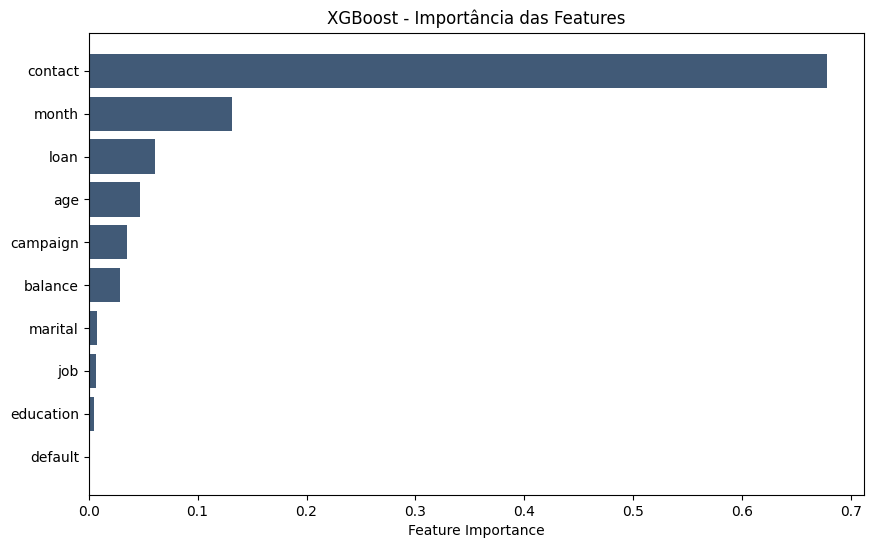

In [143]:
pallete = ['#415A77']
plt.figure(figsize=(10,6))
plt.barh(list(feature_importance.keys())[::-1], 
         list(feature_importance.values())[::-1],
         color = pallete)
plt.xlabel("Feature Importance")
plt.title("XGBoost - Importância das Features")
plt.show()

<font color = 'milkblue'>

O gráfico mostra a importância das features no modelo XGBoost otimizado, que foi escolhido como modelo campeão para o projeto.

A variável contact se destaca como a mais relevante, indicando que o canal de comunicação tem grande impacto na adesão dos clientes às campanhas. Outras features como month, loan e age também apresentam influência significativa, ajudando a orientar estratégias de segmentação e priorização de clientes.

Esse insight reforça o poder do modelo XGBoost em capturar padrões relevantes e maximizar precisão, reduzindo o risco de ofertas ineficazes e clientes que não aderem ao produto.

</font>

* # Conclusão

<font color = 'milkblue'>

A análise com XGBoost mostrou que as variáveis tipo de contato (contact) e mês da campanha (month) são as mais relevantes para prever a adesão ao depósito a prazo.

* Podemos analisar pelos gráficos:

    * Mês da campanha:
        Em maio, julho e agosto, houve maior número absoluto de adesões. Por outro lado, meses como dezembro e setembro apresentaram baixo engajamento. Isso indica que campanhas nesses meses podem ter maior retorno sobre investimento.

    * Tipo de contato:
        O contato via celular foi o mais efetivo, tanto em volume de clientes alcançados quanto em taxa de adesão. Já o telefone fixo e o contato desconhecido apresentaram resultados significativamente menores.

* Com base nisso, recomendamos:

    * Concentrar campanhas em meses de maior propensão (maio, julho e agosto), ajustando a distribuição de recursos de marketing.

    * Priorizar o canal de celular, pois é o que apresenta maior taxa de sucesso, reduzindo esforços em canais menos eficientes.

    * Segmentar clientes com características financeiras específicas (ex.: loan, balance, age) para campanhas personalizadas.

    * Otimizar a quantidade de tentativas (campaign), evitando múltiplos contatos desnecessários que não aumentam a adesão.

Conclusão:
Os resultados sugerem que o momento do contato e o canal utilizado são decisivos para o sucesso da campanha e devem guiar a estratégia de abordagem de clientes para depósitos a prazo, maximizando a adesão e a eficiência do investimento em marketing.

</font>